# <a class="anchor">**Credit Card Approval - PD**</a>

## <a class ="anchor">**Introduction** </a>

In this project, the idea it is resolve a common situation that presents in the baking business, when they have to management credit risk which seeks for identify the possibility of get loses lead for non-payment or defaulf when a counterpart does not fulfill their obligations with the entity.

For that reason, this notebook wants to create a model to predict which kind of clients that apply for a credit card can get approval base in the historial of application and client information. It is commmon in the business base on new informartion of clients create models with new information and get better prediction base in the time horizon take it. Otherwise, in the banking a default it is define when a counterpart get 60 or highest days in non-payment that kind of moment it is considered a bad client this apply for credit cards which is the case of study.

In conclusion, we will implements some manchine learning all classifier as, Xgboosting, Decision Tree, Random Forest, Logistict Regression and SVM Classifier to make a prediction of which is the probability of bad clients that we can predict. To know which is the best model we will take the best F1-Score, this metrics are good for classifier problems bacause take into account the precision and recall of a prediction for better results. This kind of work can help me in the daily of my work as data scientist in the banking business.

The information is taking from [KAGGLE - CREDIT CARD APPROVAL](https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction) for look of the dictionary of each variable.



### <a class ="anchor">*Table of Contents* </a>
<ul>
<li><a href="#EXPLO">I. Exploratory Data Analysis</a></li>
<li><a href="#METH">II. Methodology</a></li>
<li><a href="#RESUL">III. Results</a></li>
<li><a href="#CONCLU">IV. Conclusion</a></li>
</ul>

In [153]:

# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns;sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt
from datetime import datetime
import math
from yellowbrick.model_selection import LearningCurve
from yellowbrick.classifier import ROCAUC

from sklearn.pipeline import Pipeline, FeatureUnion
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_regression
from sklearn.tree import export_graphviz
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from xgboost import XGBClassifier
from datetime import timedelta
import datetime
from imblearn.over_sampling import SMOTE
import shap

from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix, classification_report, auc
from sklearn.metrics import roc_curve, roc_auc_score,make_scorer
from sklearn.model_selection import cross_val_score, KFold,cross_val_predict,StratifiedKFold,RandomizedSearchCV

pd.set_option('display.max_columns',None)
%matplotlib inline

# import databases
df_apply = pd.read_csv('C:/Users/julia/Documents/Banco/Cursos Analitica/Udacity/Data Scientist/P4/project/application_record.csv')
df_credit = pd.read_csv('C:/Users/julia/Documents/Banco/Cursos Analitica/Udacity/Data Scientist/P4/project/credit_record.csv')


## <a class="anchor" id="#EXPLO">Part I : Exploratory Data Analysis</a>

In the **PART 1** we would see in the information:
* Print the head of the datasets, shapes, nulls, duplicated and types.
* Combine the data base and create a descrite analysis to identify strange patterns

In [154]:
# look into the application information
df_apply.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [155]:
print("The number of register in the application dataset is {}.".format(df_apply.shape[0]))
print("The number of columns in the application dataset is {}.".format(df_apply.shape[1]))

The number of register in the application dataset is 438557.
The number of columns in the application dataset is 18.


In [156]:
# look into the that types
df_apply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [157]:
#identify the percetage of null in the dataset
null_apply=pd.DataFrame((df_apply.isnull().sum()/df_apply.shape[0])*100).reset_index()
null_apply.rename(columns={"index": "Variable", 0: "Percentage"},inplace=True)
print("The variable that have more that 0 porcentage of null are {} in application".format(list(null_apply[null_apply.Percentage >0]['Variable'])))

The variable that have more that 0 porcentage of null are ['OCCUPATION_TYPE'] in application


In [158]:
# checking for duplicates in the information
print("The number of duplicates in the application information {}.".format(df_apply.duplicated().sum()))
# checking unique clients
print("The unique clients in the application dataset are {}.".format(df_apply.ID.nunique()))

The number of duplicates in the application information 0.
The unique clients in the application dataset are 438510.


In [159]:
#checking unique values in each columns
for col in set(list(df_apply.columns.values[1:5])+list(df_apply.columns.values[6:])):
    print(col,df_apply[col].unique())

FLAG_OWN_REALTY ['Y' 'N']
DAYS_BIRTH [-12005 -21474 -19110 ...  -8169  -9738 -22257]
FLAG_WORK_PHONE [1 0]
CNT_CHILDREN [ 0  1  3  2  4  5 14 19  7  9 12  6]
CODE_GENDER ['M' 'F']
FLAG_OWN_CAR ['Y' 'N']
NAME_INCOME_TYPE ['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']
DAYS_EMPLOYED [-4542 -1134 -3051 ... -8300 -9020 -4884]
FLAG_EMAIL [0 1]
FLAG_MOBIL [1]
NAME_EDUCATION_TYPE ['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
FLAG_PHONE [0 1]
OCCUPATION_TYPE [nan 'Security staff' 'Sales staff' 'Accountants' 'Laborers' 'Managers'
 'Drivers' 'Core staff' 'High skill tech staff' 'Cleaning staff'
 'Private service staff' 'Cooking staff' 'Low-skill Laborers'
 'Medicine staff' 'Secretaries' 'Waiters/barmen staff' 'HR staff'
 'Realty agents' 'IT staff']
NAME_FAMILY_STATUS ['Civil marriage' 'Married' 'Single / not married' 'Separated' 'Widow']
NAME_HOUSING_TYPE ['Rented apartment' 'House / apartment' 'Municipal ap

In [160]:
# look into the credit information
df_credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [161]:
print("The number of register in the credit dataset is {}.".format(df_credit.shape[0]))
print("The number of columns in the credit dataset is {}.".format(df_credit.shape[1]))

The number of register in the credit dataset is 1048575.
The number of columns in the credit dataset is 3.


In [162]:
# look into the that types
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [163]:
#identify the percetage of null in the dataset
null_credit=pd.DataFrame((df_credit.isnull().sum()/df_credit.shape[0])*100).reset_index()
null_credit.rename(columns={"index": "Variable", 0: "Percentage"},inplace=True)
print("The variable that have more that 0 porcentage of null are {} in application".format(list(null_credit[null_credit.Percentage >0]['Variable'])))

The variable that have more that 0 porcentage of null are [] in application


In [164]:
# checking for duplicates in the information
print("The number of duplicates in the credit information {}.".format(df_credit.duplicated().sum()))
# checking unique clients
print("The unique clients in the credit dataset are {}.".format(df_credit.ID.nunique()))

The number of duplicates in the credit information 0.
The unique clients in the credit dataset are 45985.


In [165]:
#checking unique values in each columns
for col in list(df_credit.columns.values[1:]):
    print(col,df_credit[col].unique())

MONTHS_BALANCE [  0  -1  -2  -3  -4  -5  -6  -7  -8  -9 -10 -11 -12 -13 -14 -15 -16 -17
 -18 -19 -20 -21 -22 -23 -24 -25 -26 -27 -28 -29 -30 -31 -32 -33 -34 -35
 -36 -37 -38 -39 -40 -41 -42 -43 -44 -45 -46 -47 -48 -49 -50 -51 -52 -53
 -54 -55 -56 -57 -58 -59 -60]
STATUS ['X' '0' 'C' '1' '2' '3' '4' '5']


In [166]:
# merge the dataset to use and do an EDA
df = df_apply.merge(df_credit, how='inner',on=['ID'])
# print first rows
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C


In [167]:
print("The number of register in the total dataset is {}.".format(df.shape[0]))
print("The number of columns in the total dataset is {}.".format(df.shape[1]))

The number of register in the total dataset is 777715.
The number of columns in the total dataset is 20.


In [168]:
# look into the that types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

In [169]:
null_df=pd.DataFrame((df.isnull().sum()/df.shape[0])*100).reset_index()
null_df.rename(columns={"index": "Variable", 0: "Percentage"},inplace=True)
print("The variable that have more that 0 porcentage of null are {} in application".format(list(null_df[null_df.Percentage >0]['Variable'])))

The variable that have more that 0 porcentage of null are ['OCCUPATION_TYPE'] in application


In [170]:
# checking for duplicates in the information
print("The number of duplicates in the total dataset information {}.".format(df.duplicated().sum()))
# checking unique clients
print("The unique clients in the total dataset dataset are {}.".format(df.ID.nunique()))

The number of duplicates in the total dataset information 0.
The unique clients in the total dataset dataset are 36457.


In [171]:
#checking unique values in each columns
for col in set(list(df.columns.values[1:5])+list(df.columns.values[6:])):
    print(col,df[col].unique())

FLAG_OWN_REALTY ['Y' 'N']
DAYS_BIRTH [-12005 -21474 -19110 ... -21590 -15837  -9188]
FLAG_WORK_PHONE [1 0]
CNT_CHILDREN [ 0  1  3  2  4  5 14 19  7]
MONTHS_BALANCE [  0  -1  -2  -3  -4  -5  -6  -7  -8  -9 -10 -11 -12 -13 -14 -15 -16 -17
 -18 -19 -20 -21 -22 -23 -24 -25 -26 -27 -28 -29 -30 -31 -32 -33 -34 -35
 -36 -37 -38 -39 -40 -41 -42 -43 -44 -45 -46 -47 -48 -49 -50 -51 -52 -53
 -54 -55 -56 -57 -58 -59 -60]
CODE_GENDER ['M' 'F']
FLAG_OWN_CAR ['Y' 'N']
NAME_INCOME_TYPE ['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']
DAYS_EMPLOYED [ -4542  -1134  -3051 ...  -8161   -606 -11272]
FLAG_EMAIL [0 1]
FLAG_MOBIL [1]
STATUS ['C' '1' '0' 'X' '5' '4' '3' '2']
NAME_EDUCATION_TYPE ['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
FLAG_PHONE [0 1]
OCCUPATION_TYPE [nan 'Security staff' 'Sales staff' 'Accountants' 'Laborers' 'Managers'
 'Drivers' 'Core staff' 'High skill tech staff' 'Cleaning staff'
 'Private service

In  this season we create some plots on the information and get some inside about. However in the dataset we have information for many months in the client even that to do this plots, we are just get the information of clients in that at least has 12 months we want to predict good and bad clients base in PD which it is the probability of defaulf base in the max BGI in last 12 months.

In [172]:
#taking the clients that have information in the last 12 months
df_12m = df[df.MONTHS_BALANCE==-11]
print("the number of clients that have information of 12 month is {}".format(df_12m.ID.nunique()))

the number of clients that have information of 12 month is 21343


In [173]:
#getting the information of 12 months
df_pd_clients = df[df.ID.isin(df_12m.ID)]
print("the number of clients that have information of 12 month is {}".format(df_pd_clients.ID.nunique()))
df_pd_clients = df_pd_clients[df_pd_clients.MONTHS_BALANCE==0]
print("the number of clients that have information of 0 month is {}".format(df_pd_clients.ID.nunique()))
print("The are {} clients that do not have 12 months of information".format(df_12m.shape[0] - df_pd_clients.shape[0]))

the number of clients that have information of 12 month is 21343
the number of clients that have information of 0 month is 17238
The are 4105 clients that do not have 12 months of information


In [174]:
#take the information for all clients in the last 12 months
df_12m_last = df[df.MONTHS_BALANCE <=-11]
print("the number of rows that have information for getting the max status is {}".format(df_12m_last.shape[0]))

the number of rows that have information for getting the max status is 517592


In [175]:
df_pd_max_status = df_12m_last[df_12m_last.ID.isin(df_pd_clients.ID)]
print("the number of rows that have information for getting the max status is {}".format(df_pd_max_status.shape[0]))
print("the number of clients we have is {}".format(df_pd_max_status.ID.nunique()))

the number of rows that have information for getting the max status is 330533
the number of clients we have is 17238


Creating the dependent variable first we have to make changes in the variable that has the information and get the max of STATUS of the clients that information for 12 months.

In [176]:
# change the status variables that hava a letter
df_pd_max_status.loc[df_pd_max_status['STATUS']=='C','STATUS']=-2 #pay that month
df_pd_max_status.loc[df_pd_max_status['STATUS']=='X','STATUS']=-1 #Not have any uses that month
df_pd_max_status['STATUS']=df_pd_max_status['STATUS'].astype('int64')


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [177]:

#this function create the bad and good indicator (BGI)
def bad_good_clients(state):
    '''This function creatre the BGI.
    
    INPUT: list of the varaible to change
    
    OUTPUT: Create a variable with the BGI
    
    '''
    target=''
    if state in (2,3,4,5):
        BGI=1 #Risky
    else :
        BGI=0 #not Risky
        
    return BGI

In [178]:
#create the BGI for the clients for the model
df_pd_max_status['BGI'] = df_pd_max_status['STATUS'].apply(bad_good_clients)
df_pd_max_status.drop('STATUS',axis = 1 ,inplace=True)
df_pd_max_status.info()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<class 'pandas.core.frame.DataFrame'>
Int64Index: 330533 entries, 11 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   330533 non-null  int64  
 1   CODE_GENDER          330533 non-null  object 
 2   FLAG_OWN_CAR         330533 non-null  object 
 3   FLAG_OWN_REALTY      330533 non-null  object 
 4   CNT_CHILDREN         330533 non-null  int64  
 5   AMT_INCOME_TOTAL     330533 non-null  float64
 6   NAME_INCOME_TYPE     330533 non-null  object 
 7   NAME_EDUCATION_TYPE  330533 non-null  object 
 8   NAME_FAMILY_STATUS   330533 non-null  object 
 9   NAME_HOUSING_TYPE    330533 non-null  object 
 10  DAYS_BIRTH           330533 non-null  int64  
 11  DAYS_EMPLOYED        330533 non-null  int64  
 12  FLAG_MOBIL           330533 non-null  int64  
 13  FLAG_WORK_PHONE      330533 non-null  int64  
 14  FLAG_PHONE           330533 non-null  int64  
 15  FLAG_EMAIL      

In [179]:
#create the max of BGI for client in the last 12 months
BGI_client = pd.DataFrame(df_pd_max_status.groupby('ID')['BGI'].max()).reset_index()
BGI_client.head()

,ID,BGI
0,5008804,0
1,5008805,0
2,5008806,0
3,5008810,0
4,5008811,0


In [180]:
#Getting the dependent variable in the current information in clients that have 12 months of information for this variable
df_pd = df_pd_clients.merge(BGI_client,how='inner',on=['ID'])
#drop STATuS from the database that we will use it
df_pd.drop('STATUS',axis = 1 ,inplace=True)
df_pd.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,BGI
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,0
3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,0
4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,0


Brief in the last code part such as:

* First, we track the clients that has information in the last 12 months
* Second, we look for that same clients that have current information
* Create the BGI(Bad, Good Indicator)

In this part we will do:

* Create plots for every variable to identify missing data and inside that can help to know which features have some relevance in the bad clients.
* Clean the variables that need cleaning create dictionaties for Categoricals, missing values or affectation for outliers.


In [182]:
#percentage of BGI
df_pd.BGI.value_counts(normalize=True)

0    0.977202
1    0.022798
Name: BGI, dtype: float64

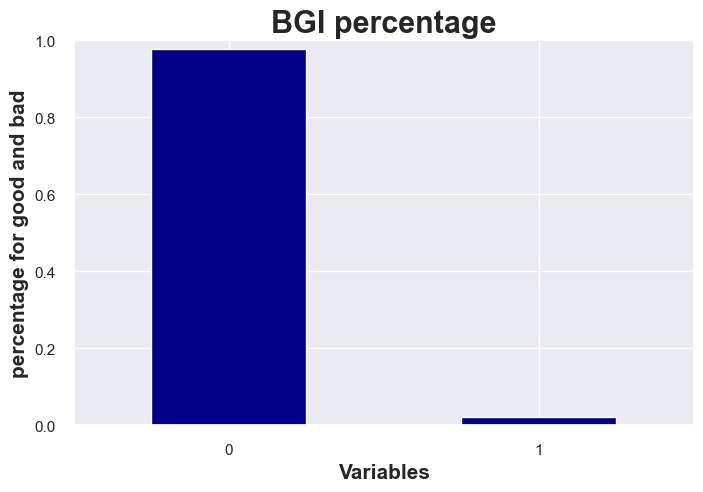

In [183]:
# plot BGI percentage
plot_dt = df_pd.BGI.value_counts(normalize=True)
plot_dt.plot(kind='bar',figsize=(8, 5),color="darkblue")
plt.title('BGI percentage',fontsize = 22,weight="bold")
plt.ylabel('percentage for good and bad',fontsize = 15,weight="bold")
plt.xticks(rotation = 0)
plt.xlabel('Variables',fontsize = 15,weight="bold")
plt.ylim(0, 1)
plt.show()

The BGI has a unbalanced between good and bad, this can generate problems when we get to do prediction. However we can do prediction with this situation also with a balance information using a methodology as SMOTE 

As we see before the occupation has the high porcentage of nulls, this lead for laborers, core staff, sales staff and Managers with the 44% the information, but we have information for clients in long period of time, we have to make sure that the nulls can get find if does not we have to work with them. 

In the next cells we are going to tried to find the missing

In [184]:
#look find for missing values in occupation
null_occupation=list(df_pd.ID[df_pd.OCCUPATION_TYPE.isnull()])
df.OCCUPATION_TYPE[df.ID.isin(null_occupation)].unique()

array([nan], dtype=object)

In [185]:
df_pd.OCCUPATION_TYPE.value_counts(normalize=True)

Laborers                 0.248347
Core staff               0.141243
Sales staff              0.128776
Managers                 0.125010
Drivers                  0.089951
High skill tech staff    0.059409
Accountants              0.052799
Medicine staff           0.048448
Cooking staff            0.024182
Security staff           0.023178
Cleaning staff           0.021504
Private service staff    0.013304
Low-skill Laborers       0.006861
Secretaries              0.005188
Waiters/barmen staff     0.004686
HR staff                 0.002678
IT staff                 0.002594
Realty agents            0.001841
Name: OCCUPATION_TYPE, dtype: float64

In [186]:
#fill nan information for plot it
df_pd.OCCUPATION_TYPE.fillna('Other',inplace=True)

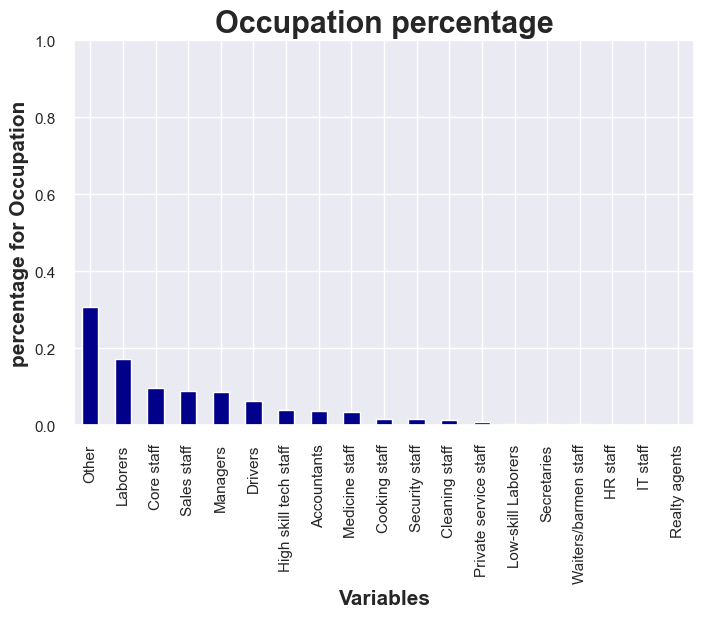

In [187]:
# Plot of occupation type
plot_dt = df_pd.OCCUPATION_TYPE.value_counts(normalize=True)
plot_dt.plot(kind='bar',figsize=(8, 5),color="darkblue")
plt.title('Occupation percentage',fontsize = 22,weight="bold")
plt.ylabel('percentage for Occupation',fontsize = 15,weight="bold")
plt.xticks(rotation = 90)
plt.xlabel('Variables',fontsize = 15,weight="bold")
plt.ylim(0, 1)
plt.show()

As we can see it is not posible to fulfill the NaN information for that reason we decide to using as a Other occupation because we consider that the Other have important information

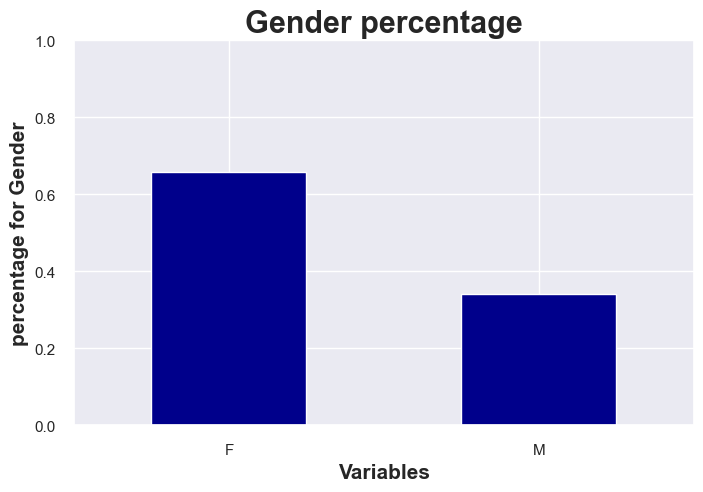

In [188]:
# Plot Gender
plot_dt = df_pd.CODE_GENDER.value_counts(normalize=True)
plot_dt.plot(kind='bar',figsize=(8, 5),color="darkblue")
plt.title('Gender percentage',fontsize = 22,weight="bold")
plt.ylabel('percentage for Gender',fontsize = 15,weight="bold")
plt.xticks(rotation = 0)
plt.xlabel('Variables',fontsize = 15,weight="bold")
plt.ylim(0, 1)
plt.show()

In the case of gender we see that we have more female than male.

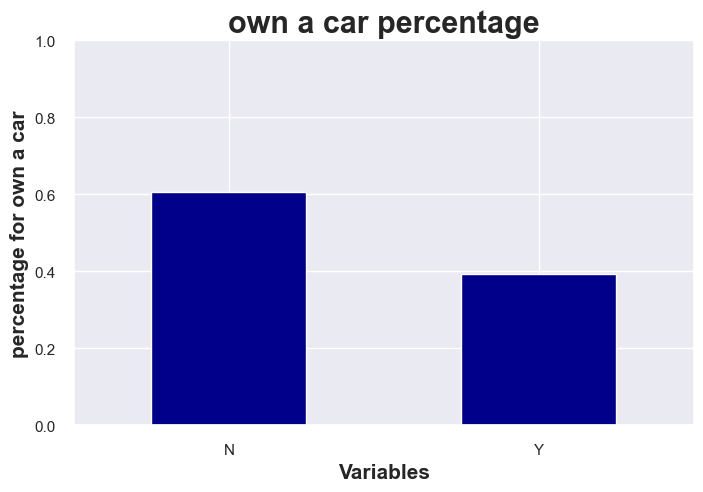

In [189]:
# Plot own car
plot_dt = df_pd.FLAG_OWN_CAR.value_counts(normalize=True)
plot_dt.plot(kind='bar',figsize=(8, 5),color="darkblue")
plt.title('own a car percentage',fontsize = 22,weight="bold")
plt.ylabel('percentage for own a car',fontsize = 15,weight="bold")
plt.xticks(rotation = 0)
plt.xlabel('Variables',fontsize = 15,weight="bold")
plt.ylim(0, 1)
plt.show()

The mayority of the clients do not own a car and just the 40% own it

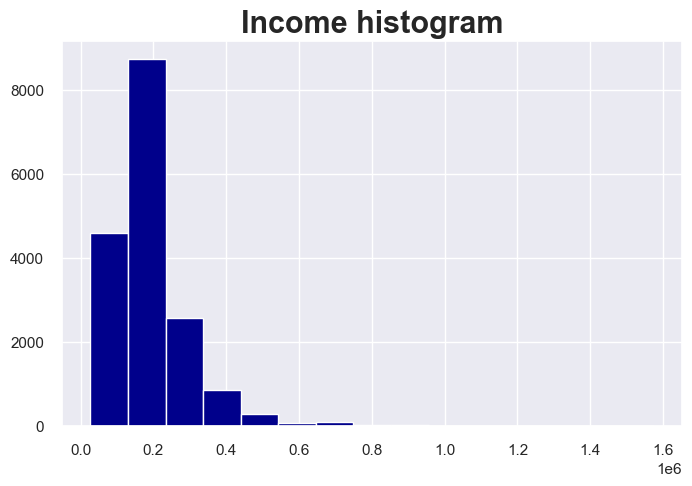

In [190]:
# histogram of AMT income
df_pd.AMT_INCOME_TOTAL.hist(bins=15,figsize=(8,5),color="darkblue");
plt.title('Income histogram',fontsize = 22,weight="bold");

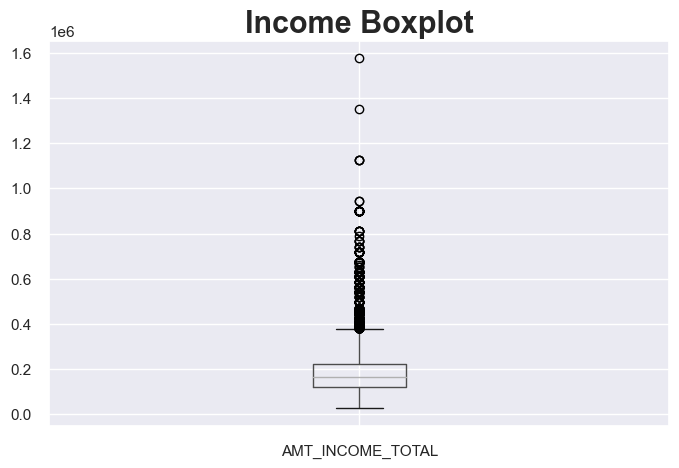

In [191]:
df_pd.boxplot('AMT_INCOME_TOTAL',figsize=(8,5));
plt.title('Income Boxplot',fontsize = 22,weight="bold");

The income amount annual:
* The histogram have a distribution for the right and it is not a normal distribution
* The boxplot show that the variable have a some outliers and we might have to do something with that.

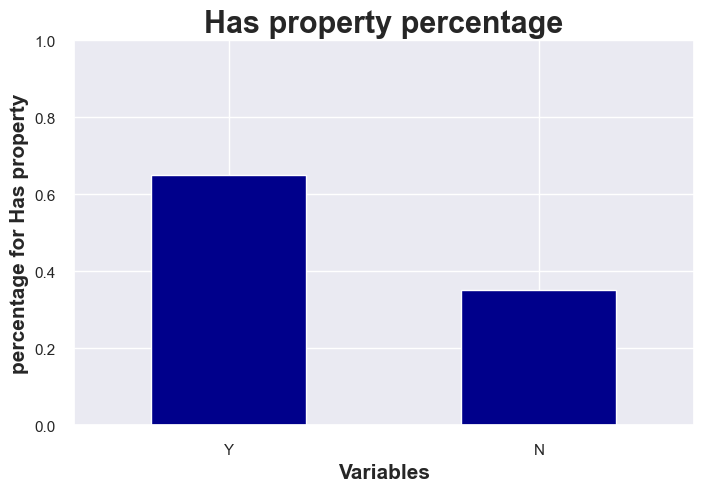

In [192]:
# Plot own property
plot_dt = df_pd.FLAG_OWN_REALTY.value_counts(normalize=True)
plot_dt.plot(kind='bar',figsize=(8, 5),color="darkblue")
plt.title('Has property percentage',fontsize = 22,weight="bold")
plt.ylabel('percentage for Has property',fontsize = 15,weight="bold")
plt.xticks(rotation = 0)
plt.xlabel('Variables',fontsize = 15,weight="bold")
plt.ylim(0, 1)
plt.show()

Clients own the property with more the 60% that can help so much in the prediction because we can assume that those clients are good to pay

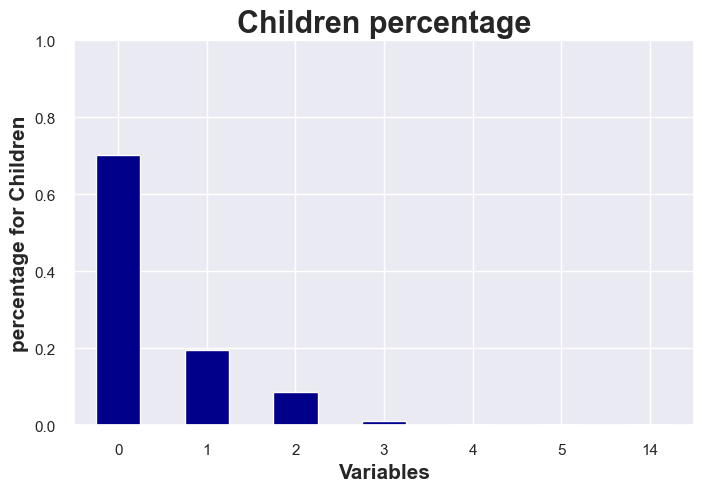

In [193]:
# Plot children
plot_dt = df_pd.CNT_CHILDREN.value_counts(normalize=True)
plot_dt.plot(kind='bar',figsize=(8, 5),color="darkblue")
plt.title('Children percentage',fontsize = 22,weight="bold")
plt.ylabel('percentage for Children',fontsize = 15,weight="bold")
plt.xticks(rotation = 0)
plt.xlabel('Variables',fontsize = 15,weight="bold")
plt.ylim(0, 1)
plt.show()

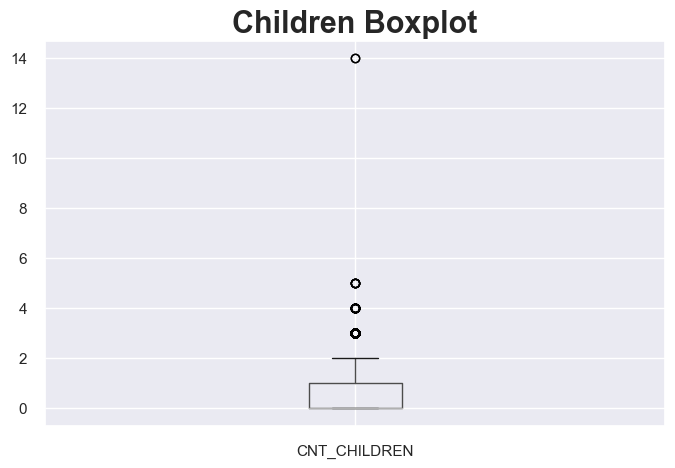

In [194]:
df_pd.boxplot('CNT_CHILDREN',figsize=(8,5));
plt.title('Children Boxplot',fontsize = 22,weight="bold");

Most of clients do not have children that means that the expenses that might cause it is possible that get to default, but it the unbalanced in the dataset cannot helps to affirm this hypotesis and also have outliers

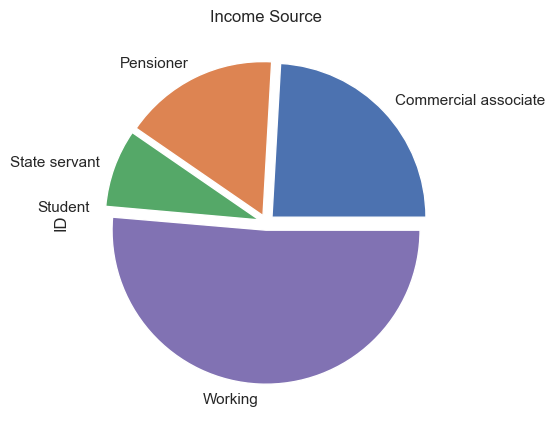

In [195]:
# Pie plot of income Source
df_pd.groupby(['NAME_INCOME_TYPE'])['ID'].count().plot(kind = 'pie', title = 'Income Source',figsize=(5,5),explode=(0.05,0.05,0.05,0.05,0.05));

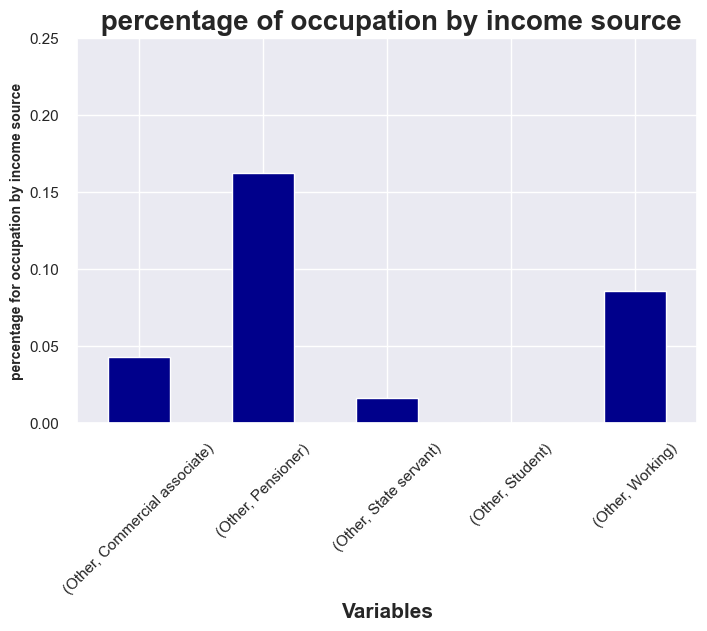

In [196]:
plot_dt = (df_pd[df_pd.OCCUPATION_TYPE=='Other'].groupby(['OCCUPATION_TYPE','NAME_INCOME_TYPE'])['ID'].count()/df_pd.shape[0])
plot_dt.plot(kind='bar',figsize=(8, 5),color="darkblue")
plt.title(' percentage of occupation by income source',fontsize = 20,weight="bold")
plt.ylabel('percentage for occupation by income source',fontsize = 10,weight="bold")
plt.xticks(rotation = 45)
plt.xlabel('Variables',fontsize = 15,weight="bold")
plt.ylim(0, 0.25)
plt.show()

From the pie plot we can see that the income source that have more clients is working and follow for commerciall associate because we do not have missing values in this information the solution that we did for occupation seen right looking in the bar plot.

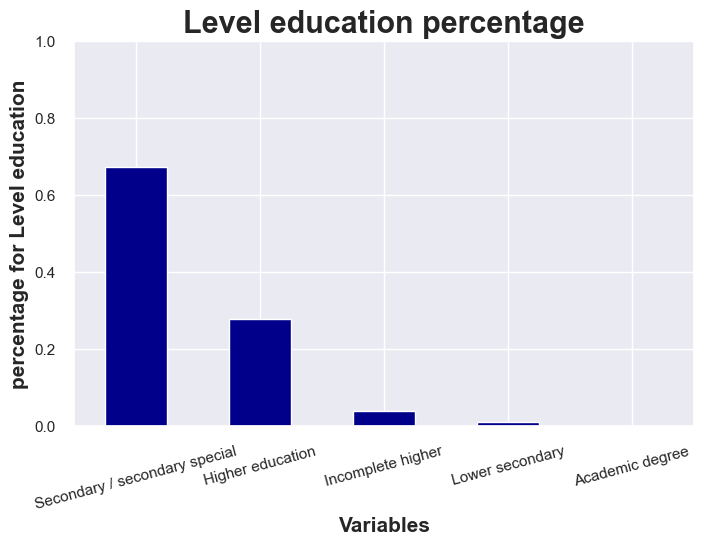

In [197]:
# Plot type education
plot_dt = df_pd.NAME_EDUCATION_TYPE.value_counts(normalize=True)
plot_dt.plot(kind='bar',figsize=(8, 5),color="darkblue")
plt.title('Level education percentage',fontsize = 22,weight="bold")
plt.ylabel('percentage for Level education',fontsize = 15,weight="bold")
plt.xticks(rotation = 15)
plt.xlabel('Variables',fontsize = 15,weight="bold")
plt.ylim(0, 1)
plt.show()

The clients of the credit card approval they have a secondary degree and just more the 20% of the people have higher education

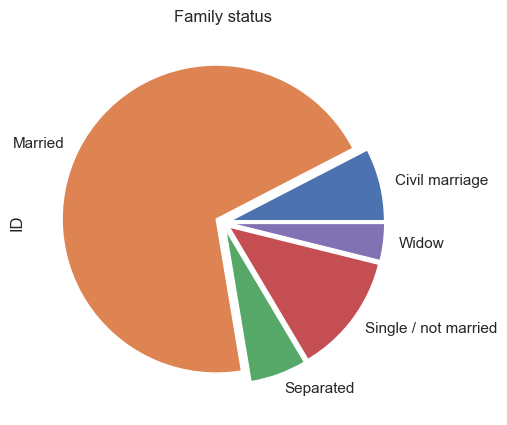

In [198]:
df_pd.groupby(['NAME_FAMILY_STATUS'])['ID'].count().plot(kind = 'pie', title = 'Family status',figsize=(5,5),explode=(0.05,0.05,0.05,0.05,0.05));

Clients in 70% are married and the rest of the sample are single

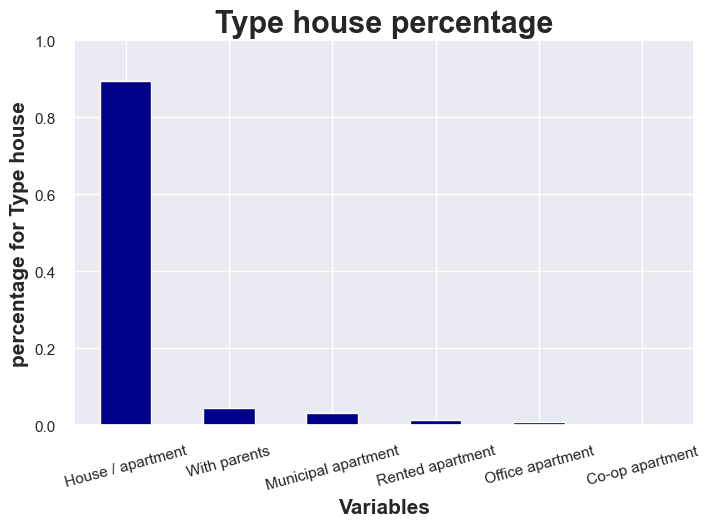

In [199]:
# Plot type house
plot_dt = df_pd.NAME_HOUSING_TYPE.value_counts(normalize=True)
plot_dt.plot(kind='bar',figsize=(8, 5),color="darkblue")
plt.title('Type house percentage',fontsize = 22,weight="bold")
plt.ylabel('percentage for Type house',fontsize = 15,weight="bold")
plt.xticks(rotation = 15)
plt.xlabel('Variables',fontsize = 15,weight="bold")
plt.ylim(0, 1)
plt.show()

All clients live in a house / apartment with more the 80%

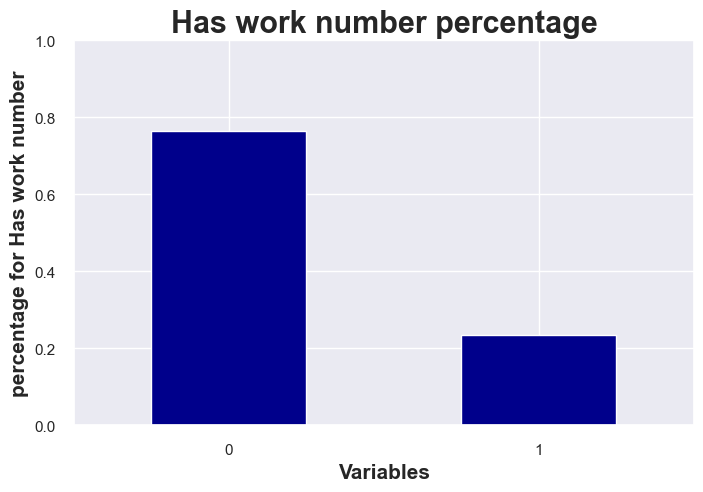

In [200]:
# Plot work phone number
plot_dt = df_pd.FLAG_WORK_PHONE.value_counts(normalize=True)
plot_dt.plot(kind='bar',figsize=(8, 5),color="darkblue")
plt.title('Has work number percentage',fontsize = 22,weight="bold")
plt.ylabel('percentage for Has work number',fontsize = 15,weight="bold")
plt.xticks(rotation = 0)
plt.xlabel('Variables',fontsize = 15,weight="bold")
plt.ylim(0, 1)
plt.show()

In the information we have the number from clients work for more the 20%

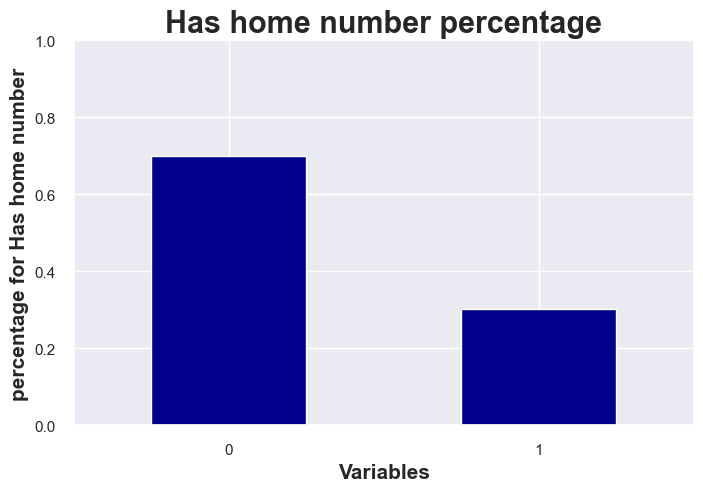

In [201]:
# Plot home number
plot_dt = df_pd.FLAG_PHONE.value_counts(normalize=True)
plot_dt.plot(kind='bar',figsize=(8, 5),color="darkblue")
plt.title('Has home number percentage',fontsize = 22,weight="bold")
plt.ylabel('percentage for Has home number',fontsize = 15,weight="bold")
plt.xticks(rotation = 0)
plt.xlabel('Variables',fontsize = 15,weight="bold")
plt.ylim(0, 1)
plt.show()

In the information we have the number from clients home for more the 30%

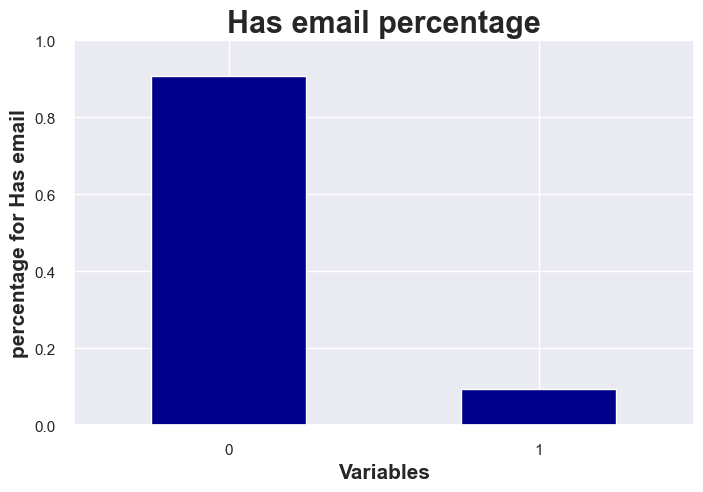

In [202]:
# Plot email
plot_dt = df_pd.FLAG_EMAIL.value_counts(normalize=True)
plot_dt.plot(kind='bar',figsize=(8, 5),color="darkblue")
plt.title('Has email percentage',fontsize = 22,weight="bold")
plt.ylabel('percentage for Has email',fontsize = 15,weight="bold")
plt.xticks(rotation = 0)
plt.xlabel('Variables',fontsize = 15,weight="bold")
plt.ylim(0, 1)
plt.show()

In the information we have just the 10% of the emails from clients and this it is a important information nowadays.

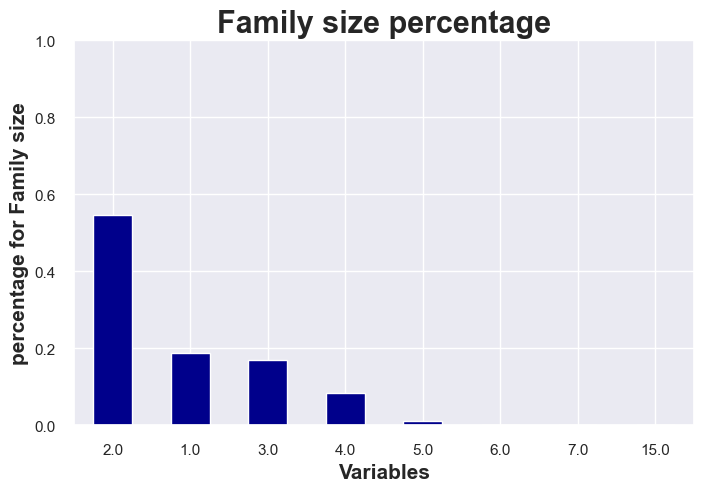

In [203]:
# Plot home number
plot_dt = df_pd.CNT_FAM_MEMBERS.value_counts(normalize=True)
plot_dt.plot(kind='bar',figsize=(8, 5),color="darkblue")
plt.title('Family size percentage',fontsize = 22,weight="bold")
plt.ylabel('percentage for Family size',fontsize = 15,weight="bold")
plt.xticks(rotation = 0)
plt.xlabel('Variables',fontsize = 15,weight="bold")
plt.ylim(0, 1)
plt.show()

As we see before the mayority of the clients' family nucleus are just 2 because as in see in the children information the mayority do not have children.

After doing a plot for each of varibles possibles next we describe de findings and the clean process to do:
* First, we have to drop some variables because they do not generated value such as, FLAG_MOBIL, ID, OCCUPATION, MONTHS_BALANCE. Looks odd that we want to drop occupation after to prove the change of the NaN give information but using income source can get the same result.
* Then we have to create dummies of change the Y o N in the variables with this answer for binary information. Also create a age and the days at work because we have a number that does not have any value. 
* Clean the information has education level that have information such as, "Secondary /  secondary special" with have to split.
* Create the AGE and AGE employment and verify the information if it has something odd getting fix.
* Also we have outliers in the income and the number of children so we are to try to fixed
* For last we create a dictionaries for the last kind of variables for can read fot the models that we a gonna implement.

In [204]:
#Drop information
df_pd.drop('FLAG_MOBIL',axis = 1, inplace = True)
df_pd.drop('OCCUPATION_TYPE',axis = 1, inplace = True)
df_pd.drop('MONTHS_BALANCE',axis = 1, inplace = True)
df_pd['CNT_FAM_MEMBERS']=df_pd['CNT_FAM_MEMBERS'].astype('int64')
df_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17238 entries, 0 to 17237
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   17238 non-null  int64  
 1   CODE_GENDER          17238 non-null  object 
 2   FLAG_OWN_CAR         17238 non-null  object 
 3   FLAG_OWN_REALTY      17238 non-null  object 
 4   CNT_CHILDREN         17238 non-null  int64  
 5   AMT_INCOME_TOTAL     17238 non-null  float64
 6   NAME_INCOME_TYPE     17238 non-null  object 
 7   NAME_EDUCATION_TYPE  17238 non-null  object 
 8   NAME_FAMILY_STATUS   17238 non-null  object 
 9   NAME_HOUSING_TYPE    17238 non-null  object 
 10  DAYS_BIRTH           17238 non-null  int64  
 11  DAYS_EMPLOYED        17238 non-null  int64  
 12  FLAG_WORK_PHONE      17238 non-null  int64  
 13  FLAG_PHONE           17238 non-null  int64  
 14  FLAG_EMAIL           17238 non-null  int64  
 15  CNT_FAM_MEMBERS      17238 non-null 

In [205]:
#create dummies
df_pd['CARS'] = pd.get_dummies(df_pd['FLAG_OWN_CAR'],drop_first=True) #1 have car - 0 does not have
df_pd['CARS']= df_pd['CARS'].astype('int64')
df_pd['STATE_PROPERTY'] = pd.get_dummies(df_pd['FLAG_OWN_REALTY'],drop_first=True) #1 have house - 0 does not have
df_pd['STATE_PROPERTY']=df_pd['STATE_PROPERTY'].astype('int64')
df_pd.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,BGI,CARS,STATE_PROPERTY
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,2,0,1,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,2,0,1,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,2,0,1,1
3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,1,0,0,1
4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,1,0,0,1


In [206]:
#Drop variable of dummies
df_pd.drop('FLAG_OWN_CAR',axis = 1, inplace = True)
df_pd.drop('FLAG_OWN_REALTY',axis = 1, inplace = True)
df_pd.head()

,ID,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,BGI,CARS,STATE_PROPERTY
0,5008804,M,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,2,0,1,1
1,5008805,M,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,2,0,1,1
2,5008806,M,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,2,0,1,1
3,5008810,F,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,1,0,0,1
4,5008811,F,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,1,0,0,1


In [207]:
## Create the functions for days and convert to date
def birth_days(number_days):
    '''
    This function the number birth days or employ days and convert into date format
    INPUT: list of birth or employ day 
    OUTPUT: list of date format
    '''
    date = datetime.date.today()
    date_format = (date + timedelta(days=number_days)).strftime('%Y-%m-%d')
    return date_format                  

def AGE(date_format):
    '''
    This function take the date and give the of birth or employment base in today day
    INPUT: list of datee 
    OUTPUT: list of age
    '''
    current_day=datetime.date.today()
    birth_date=datetime.datetime.strptime(date_format,'%Y-%m-%d')
    age=current_day.year-birth_date.year
    return age

In [208]:
#crete the dates in the variable need it
df_pd['DAYS_BIRTH'] = df_pd['DAYS_BIRTH'].apply(birth_days)
df_pd['DAYS_EMPLOYED'] = df_pd['DAYS_EMPLOYED'].apply(birth_days)
df_pd.head()

,ID,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,BGI,CARS,STATE_PROPERTY
0,5008804,M,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1989-12-29,2010-06-05,1,0,0,2,0,1,1
1,5008805,M,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1989-12-29,2010-06-05,1,0,0,2,0,1,1
2,5008806,M,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1964-01-26,2019-10-04,0,0,0,2,0,1,1
3,5008810,F,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1970-07-17,2014-07-05,0,1,1,1,0,0,1
4,5008811,F,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1970-07-17,2014-07-05,0,1,1,1,0,0,1


In [209]:
#generate age for the employment and clients
df_pd['AGE'] = df_pd['DAYS_BIRTH'].apply(AGE)
df_pd['AGE_EMPLOY'] = df_pd['DAYS_EMPLOYED'].apply(AGE)
df_pd.head()

,ID,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,BGI,CARS,STATE_PROPERTY,AGE,AGE_EMPLOY
0,5008804,M,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1989-12-29,2010-06-05,1,0,0,2,0,1,1,33,12
1,5008805,M,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1989-12-29,2010-06-05,1,0,0,2,0,1,1,33,12
2,5008806,M,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1964-01-26,2019-10-04,0,0,0,2,0,1,1,58,3
3,5008810,F,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1970-07-17,2014-07-05,0,1,1,1,0,0,1,52,8
4,5008811,F,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1970-07-17,2014-07-05,0,1,1,1,0,0,1,52,8


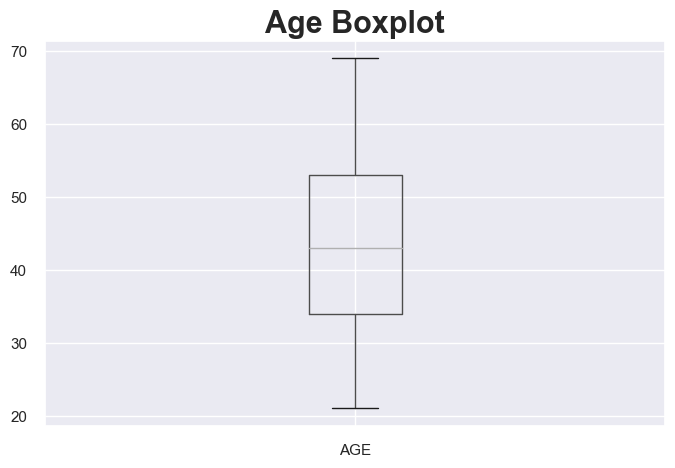

In [210]:
df_pd.boxplot('AGE',figsize=(8,5));
plt.title('Age Boxplot',fontsize = 22,weight="bold");

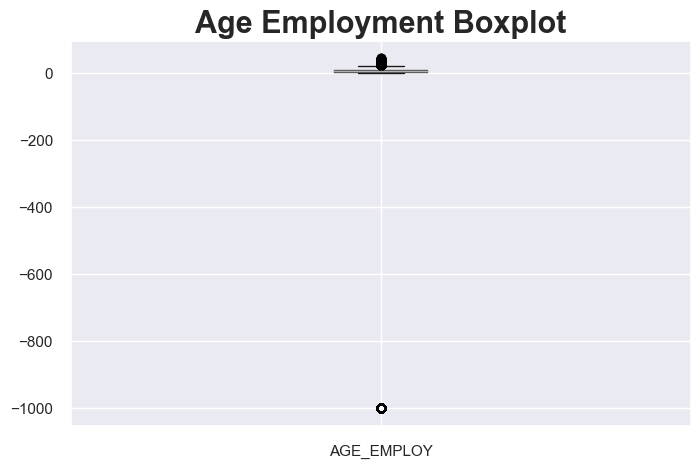

In [211]:
df_pd.boxplot('AGE_EMPLOY',figsize=(8,5));
plt.title('Age Employment Boxplot',fontsize = 22,weight="bold");

Looking into the new variables of AGE and AGE_EMPLOY, the first does not have problems but the AGE_EMPLOY have some big outliers we need to fixing, we are going to use the Tukey method for fixing outliers that helps with the range of the distribution y reduce the dimensionality.

In [212]:
# Tukey method
def tukey_method(data,varible):
    
    '''
    This function create a range interquartle for identify outliers
    
    INPUT: Database to clean, 
           Name the variable with outliers
    OUTPUT: DataFrame with the ID and the Value of the outliers
    '''

    outliers_age_employ = df_pd[['ID',varible]]
    #finding quantiles

    q1 = outliers_age_employ[varible].quantile(0.25)

    q3 = outliers_age_employ[varible].quantile(0.75)

    #calcule interquartile

    iqr = q3-q1

    #finding the min a max interquartile

    max_value = q3 + 1.5 * iqr

    min_value = q1 - 1.5 * iqr

    outliers = outliers_age_employ[(outliers_age_employ[varible] > max_value) | (outliers_age_employ[varible] < min_value)]
    #outliers.varible2.value_counts()
    return outliers

We are gonna use this function for each variable that we identify with outliers.

In [213]:
#getting the outliers
outliers_age_employ = tukey_method(df_pd,'AGE_EMPLOY')
#taka out the ID
df_pd = df_pd[~df_pd['ID'].isin(outliers_age_employ.ID)]

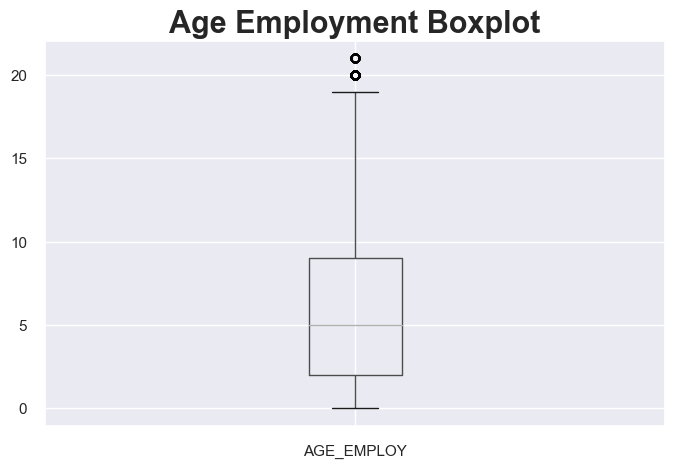

In [214]:
df_pd.boxplot('AGE_EMPLOY',figsize=(8,5));
plt.title('Age Employment Boxplot',fontsize = 22,weight="bold");

In [215]:
##getting the outliers
outliers_income = tukey_method(df_pd,'AMT_INCOME_TOTAL')
#take out the ID's
df_pd = df_pd[~df_pd['ID'].isin(outliers_income.ID)]

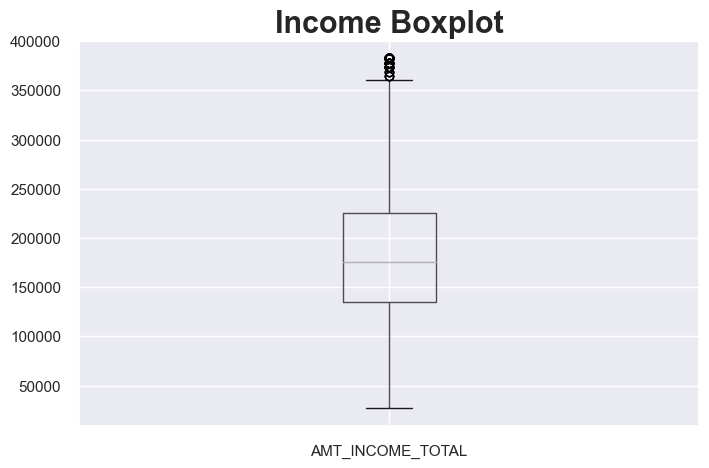

In [216]:
df_pd.boxplot('AMT_INCOME_TOTAL',figsize=(8,5));
plt.title('Income Boxplot',fontsize = 22,weight="bold");

In [217]:
#getting the outliers
outliers_child = tukey_method(df_pd,'CNT_CHILDREN')
#Take out the ID's
df_pd = df_pd[~df_pd['ID'].isin(outliers_child.ID)]

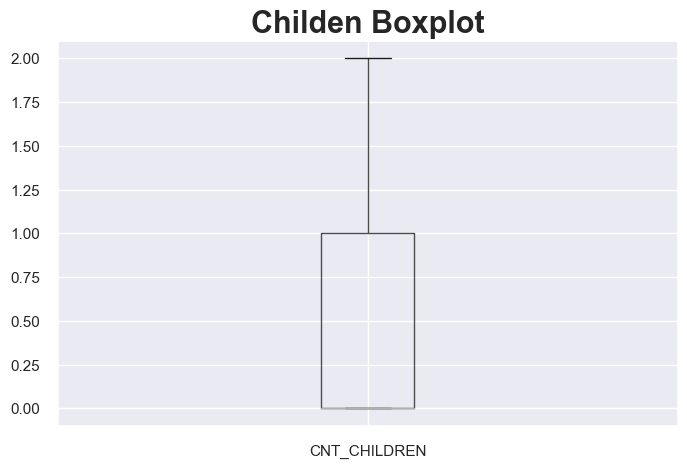

In [218]:
df_pd.boxplot('CNT_CHILDREN',figsize=(8,5));
plt.title('Childen Boxplot',fontsize = 22,weight="bold");

As we can see now every thing looks normal and we remove the outliers in the information, this will helps us in the model of the modeling because some models could work good with outliers.

In [219]:
#drop dates
df_pd.drop('DAYS_BIRTH',axis = 1, inplace = True)
df_pd.drop('DAYS_EMPLOYED',axis = 1, inplace = True)
df_pd.head()

,ID,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,BGI,CARS,STATE_PROPERTY,AGE,AGE_EMPLOY
2,5008806,M,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,2,0,1,1,58,3
3,5008810,F,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,1,0,0,1,52,8
4,5008811,F,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,1,0,0,1,52,8
6,5112956,M,0,270000.0,Working,Higher education,Married,House / apartment,1,1,1,2,0,1,1,46,2
7,5008825,F,0,130500.0,Working,Incomplete higher,Married,House / apartment,0,0,0,2,0,1,0,29,3


In [220]:
#clean the / in the variables that have it
def split_variable(x):
    ''' This function take out the special characters
    INPUT: list of the variable with special characters
    OUTPUT: list of the variable without special characters
    '''
    if x=='Secondary / secondary special' or 'Single / not married' or 'House / apartment':
        x=x.split(' / ')[0]
    return x

In [221]:
# taking special character
df_pd['NAME_EDUCATION_TYPE'] = df_pd['NAME_EDUCATION_TYPE'].apply(split_variable)
df_pd['NAME_FAMILY_STATUS'] = df_pd['NAME_FAMILY_STATUS'].apply(split_variable)
df_pd['NAME_HOUSING_TYPE'] = df_pd['NAME_HOUSING_TYPE'].apply(split_variable)
df_pd.head()

,ID,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,BGI,CARS,STATE_PROPERTY,AGE,AGE_EMPLOY
2,5008806,M,0,112500.0,Working,Secondary,Married,House,0,0,0,2,0,1,1,58,3
3,5008810,F,0,270000.0,Commercial associate,Secondary,Single,House,0,1,1,1,0,0,1,52,8
4,5008811,F,0,270000.0,Commercial associate,Secondary,Single,House,0,1,1,1,0,0,1,52,8
6,5112956,M,0,270000.0,Working,Higher education,Married,House,1,1,1,2,0,1,1,46,2
7,5008825,F,0,130500.0,Working,Incomplete higher,Married,House,0,0,0,2,0,1,0,29,3


In [222]:
#create dictonaries
list_income = {'Working':1, 'Commercial associate':2, 'Pensioner':3, 'State servant':4,'Student':5}
list_family = {'Civil marriage':1, 'Married':2, 'Single':3, 'Separated':4, 'Widow':5}
list_education = {'Higher education':1, 'Secondary':2, 'Incomplete higher':3,'Lower secondary':4, 'Academic degree':5}
list_house = {'Rented apartment':1, 'House':2, 'Municipal apartment':3, 'With parents':4,'Co-op apartment':5, 'Office apartment':6}
list_gender = {'M':0,'F':1}

In [223]:
#change variable and implement dictonaries
df_pd.replace({'NAME_INCOME_TYPE':list_income},inplace=True)
df_pd.replace({'NAME_FAMILY_STATUS':list_family},inplace=True)
df_pd.replace({'NAME_EDUCATION_TYPE':list_education},inplace=True)
df_pd.replace({'NAME_HOUSING_TYPE':list_house},inplace=True)
df_pd.replace({'CODE_GENDER':list_gender},inplace=True)
df_pd.head()

,ID,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,BGI,CARS,STATE_PROPERTY,AGE,AGE_EMPLOY
2,5008806,0,0,112500.0,1,2,2,2,0,0,0,2,0,1,1,58,3
3,5008810,1,0,270000.0,2,2,3,2,0,1,1,1,0,0,1,52,8
4,5008811,1,0,270000.0,2,2,3,2,0,1,1,1,0,0,1,52,8
6,5112956,0,0,270000.0,1,1,2,2,1,1,1,2,0,1,1,46,2
7,5008825,1,0,130500.0,1,3,2,2,0,0,0,2,0,1,0,29,3


In [224]:
#Drop ID
df_pd.drop('ID',axis = 1, inplace = True)

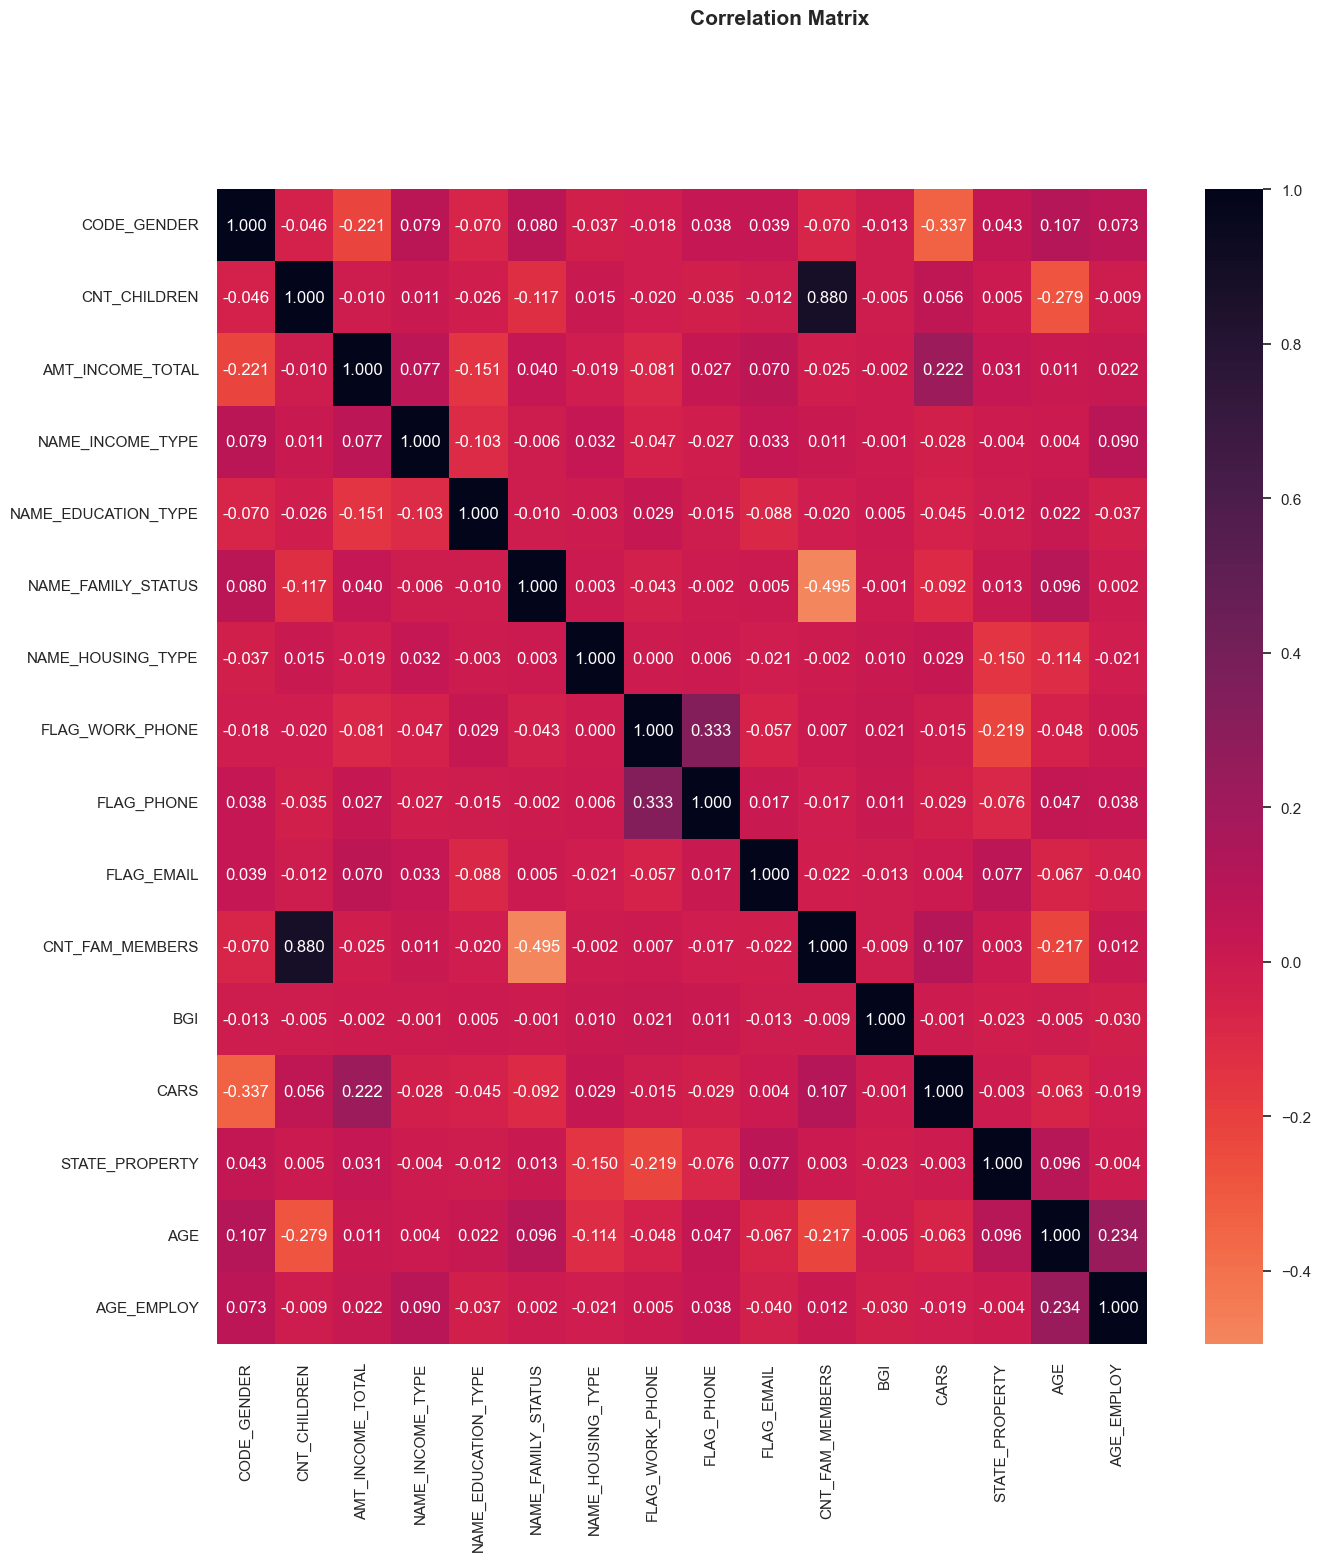

In [225]:
plt.figure(figsize = [15,15]);
sns.heatmap(df_pd.corr(), annot = True, fmt = '.3f',cmap = 'rocket_r', center = 0);
plt.suptitle('Correlation matrix'.title(),y = 1,fontsize = 15,weight="bold");
plt.xticks(rotation=90);
plt.yticks(rotation=0);

Looking into the correlation matrix we can see that the CNT_CHILDREN have high correlation with CNT_FAM_MEMBERS, as we see before the number in families the most representive are two so this variable do not give much information

In [226]:
# Drop variables are not given more informartion for high correlation
df_pd.drop('CNT_CHILDREN',axis = 1, inplace = True)

After cleaning we have the information ready to implement models to get the prediction of BGI and get the PD of clients that have exceed the 60 days of non-payment

## <a class="anchor" id="#METH">Part II: Methodology</a>

For this part as we brief in the introduction we are gonna implement five types of modelos for classifier problems as this one. However, in this part we are going to divide in three parts:
* First, we are implement the same models with balanced BGI using a SMOTE methodoloty, in this link [SMOTE](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/) Or in this one [SMOTE 2](https://towardsdatascience.com/5-smote-techniques-for-oversampling-your-imbalance-data-b8155bdbe2b5) can find more explanation.
* Second, run a ANOVA model to identify the importance of the variables for a model which will be good for using.
* At the end, run each model.

### Balance Base

In this section we run a SMOTE for balance the data set for get more information and get better results in the modeling, also do a preprocessing.

In [239]:
#Define independent and dependent variable
#Independent
X = df_pd.drop(columns=['BGI'],axis=1)
#Dependent
y = df_pd['BGI']#.astype('category')

In [240]:
y.value_counts(normalize=True)

0    0.977994
1    0.022006
Name: BGI, dtype: float64

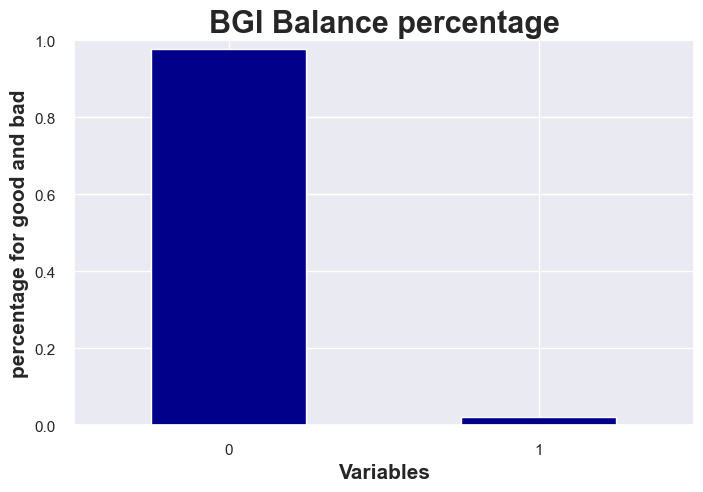

In [241]:
#validation of the balance
plot_dt = y.value_counts(normalize=True)
plot_dt.plot(kind='bar',figsize=(8, 5),color="darkblue")
plt.title('BGI Balance percentage',fontsize = 22,weight="bold")
plt.ylabel('percentage for good and bad',fontsize = 15,weight="bold")
plt.xticks(rotation = 0)
plt.xlabel('Variables',fontsize = 15,weight="bold")
plt.ylim(0, 1)
plt.show()

In [242]:
#custom Transformer that extracts columns passed as argument
class FeatureSelector(BaseEstimator,TransformerMixin):
    #Class constructor
    def __init__(self,feature_names):
        self.feature_names = feature_names
    #Return self nothing else to do here
    def fit(self,X,y = None):
        return self
    #Method that decribes what we need this transformer to do
    def transform(self,X,y=None):
        return X[self.feature_names]

In [243]:
# get the numerical variables names
numerical_features = list(X.select_dtypes(["int64","float64"]).columns)

#create the steps for the numerical pipeline
numerical_steps = [('num_selector',FeatureSelector(numerical_features)),
                   ('std_scaler',RobustScaler())]

#create two piples with the respective steps
numerical_pipeline =  Pipeline(numerical_steps)

#create a list of the pipeline
pipeline_list = [('numerical_pipeline',numerical_pipeline)]
#create the full pipeline
pipeline_preprocessing = FeatureUnion(transformer_list=pipeline_list)

In [244]:
#Create the split in train and test data set
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=42,shuffle=True,stratify=y)

In [245]:
#balance the of the dataset to train
smote_model = SMOTE(random_state=42,sampling_strategy='all')
b_xtrain,b_ytrain = smote_model.fit_resample(Xtrain,ytrain)

For good practice of modeling we have just balanced the training data because when we implement a model and need to do prediction base in new data we are not going to have that on balanced for that reason we do it this way, and get prediction base on that.

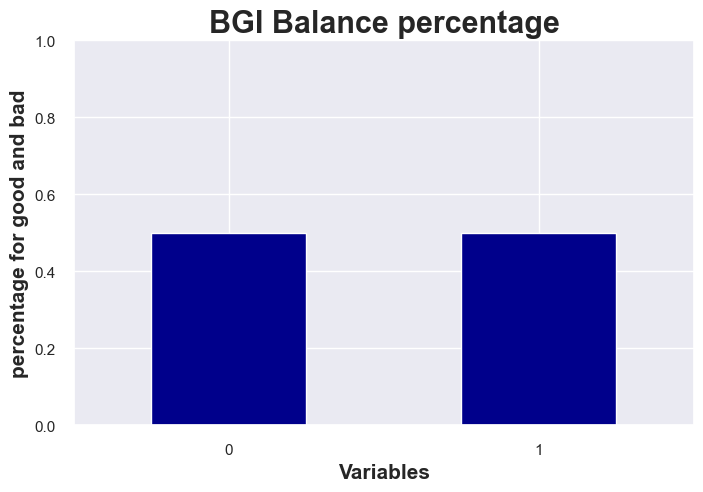

In [246]:
#validation of the balance
plot_dt = b_ytrain.value_counts(normalize=True)
plot_dt.plot(kind='bar',figsize=(8, 5),color="darkblue")
plt.title('BGI Balance percentage',fontsize = 22,weight="bold")
plt.ylabel('percentage for good and bad',fontsize = 15,weight="bold")
plt.xticks(rotation = 0)
plt.xlabel('Variables',fontsize = 15,weight="bold")
plt.ylim(0, 1)
plt.show()

In [247]:
#save the pipeline with the transform parameters
pipeline_preprocessing.fit(b_xtrain)

FeatureUnion(transformer_list=[('numerical_pipeline',
                                Pipeline(steps=[('num_selector',
                                                 FeatureSelector(feature_names=['CODE_GENDER',
                                                                                'AMT_INCOME_TOTAL',
                                                                                'NAME_INCOME_TYPE',
                                                                                'NAME_EDUCATION_TYPE',
                                                                                'NAME_FAMILY_STATUS',
                                                                                'NAME_HOUSING_TYPE',
                                                                                'FLAG_WORK_PHONE',
                                                                                'FLAG_PHONE',
                                                                                'FLAG_EMAIL',
                                                                                'CNT_FAM_MEMBERS',
                                                                                'CARS',
                                                                                'STATE_PROPERTY',
                                                                                'AGE',
                                                                                'AGE_EMPLOY'])),
                                                ('std_scaler',
                                                 RobustScaler())]))])

In [248]:
#crete the full pipeline
ban_xtrain = pipeline_preprocessing.transform(b_xtrain)
ban_xtrain = pd.DataFrame(ban_xtrain,columns=numerical_features)

### Feature selection

#### Anova

The idea principal to run an ANOVA it is look into the variability in the variables and get the better performance for the model and the f test that are less of the 0.05 you can find more information in this [ANOVA](https://www.investopedia.com/terms/a/anova.asp)

In [249]:
# add constant for run anova
ban_xtrain_conts = sm.add_constant(ban_xtrain.copy())

In [250]:
#Define model anova
np.random.seed(42)
model_anova = ols("BGI~ const + CODE_GENDER + AMT_INCOME_TOTAL + NAME_INCOME_TYPE + NAME_EDUCATION_TYPE + NAME_FAMILY_STATUS + NAME_HOUSING_TYPE + FLAG_WORK_PHONE + FLAG_PHONE + FLAG_EMAIL + CNT_FAM_MEMBERS + CARS + STATE_PROPERTY + AGE + AGE_EMPLOY", data = (pd.DataFrame(pd.concat([pd.DataFrame(b_ytrain).reset_index(drop=True),ban_xtrain_conts],axis=1)))).fit()

In [251]:
#Run the model as a logit because it is binary
aov = sm.stats.anova_lm(model_anova,type=2,random_state=42)
df_anova = pd.DataFrame(aov).reset_index()
#Took varibles that pass the test
list_variables = df_anova[(df_anova['PR(>F)']*100)<0.05]['index'].values.tolist()

In [252]:
#use the variables that pass the ANOVA test
b_xtrain=b_xtrain[list_variables]
Xtest=Xtest[list_variables]

We run again the preprocessing over the train base because we have new variables after the selection with the ANOVA this will doing over the balanced again.

In [253]:
# get the numerical variables names
numerical_features = list(b_xtrain.select_dtypes(["int64","float64"]).columns)

#create the steps for the numerical pipeline
numerical_steps = [('num_selector',FeatureSelector(numerical_features)),
                   ('std_scaler',RobustScaler())]

#create two piples with the respective steps
numerical_pipeline =  Pipeline(numerical_steps)

#create a list of the pipeline
pipeline_list = [('numerical_pipeline',numerical_pipeline)]
#create the full pipeline
pipeline_preprocessing = FeatureUnion(transformer_list=pipeline_list)

In [254]:
#save the pipeline with the transform parameters
pipeline_preprocessing.fit(b_xtrain)

FeatureUnion(transformer_list=[('numerical_pipeline',
                                Pipeline(steps=[('num_selector',
                                                 FeatureSelector(feature_names=['CODE_GENDER',
                                                                                'AMT_INCOME_TOTAL',
                                                                                'NAME_INCOME_TYPE',
                                                                                'NAME_EDUCATION_TYPE',
                                                                                'NAME_FAMILY_STATUS',
                                                                                'NAME_HOUSING_TYPE',
                                                                                'FLAG_WORK_PHONE',
                                                                                'FLAG_PHONE',
                                                                                'FLAG_EMAIL',
                                                                                'CNT_FAM_MEMBERS',
                                                                                'CARS',
                                                                                'STATE_PROPERTY',
                                                                                'AGE_EMPLOY'])),
                                                ('std_scaler',
                                                 RobustScaler())]))])

In [255]:
#crete the full pipeline
ban_xtrain = pipeline_preprocessing.transform(b_xtrain)
ban_xtrain = pd.DataFrame(ban_xtrain,columns=numerical_features) 

### Xgboost

In the follow link you can find information about the model [XGBC](https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/)

In [256]:
#crethe the grid seachr for best parameters
param_grid={"learning_rate":[0.001],
            "colsample_bytree":[0.6,0.8],
            "max_depth":[2,4,6,8],
            "subsample":[0.6,0.8],
            "n_estimators":[100,200,300],
            "reg_lambda":[0.5,1,1.5,2],
            "gamma":[0,0.1,0.3],
            "random_state":[42]
            }
#Define de model
model_XGBC = XGBClassifier(objective='binary:logistic',random_state = 42,use_label_encoder=False,
                           eval_metric=["error","auc"])

scoring = {'AUC':'roc_auc',
           'Accuracy':make_scorer(accuracy_score)}

#create the kfold obejtct
num_fold = 10
kfold = StratifiedKFold(n_splits=num_fold,random_state=42,shuffle=True)

#create the grid search object
n_iter = 25
grid = RandomizedSearchCV(
    estimator=model_XGBC,
    param_distributions=param_grid,
    cv=kfold,
    scoring=scoring,
    n_jobs=-1,
    n_iter=n_iter,
    refit="AUC",
    random_state=42
)
#fit the model
best_XGBC_model = grid.fit(ban_xtrain,b_ytrain)
print(best_XGBC_model.best_estimator_)

`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=['error', 'auc'], feature_types=None, gamma=0.3,
              gpu_id=-1, grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.001, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=8, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=42, ...)


In [257]:
#save the model
XGBC_model = best_XGBC_model.best_estimator_

In [258]:
#doing the preprocessing for the test information
xtest = pipeline_preprocessing.transform(Xtest)
xtest = pd.DataFrame(xtest,columns=numerical_features)

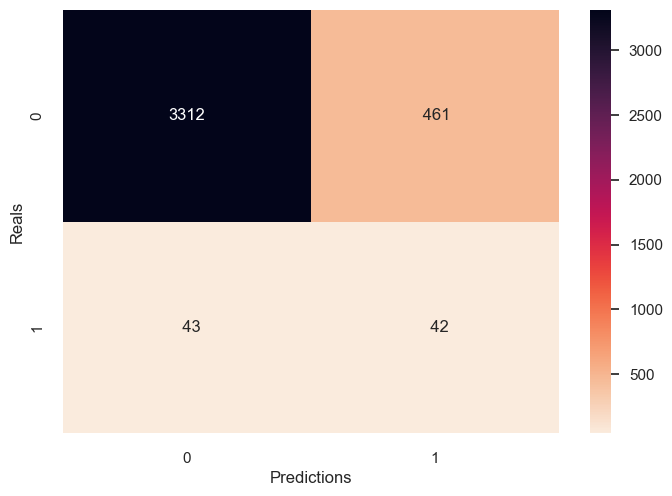

              precision    recall  f1-score   support

           0     0.9872    0.8778    0.9293      3773
           1     0.0835    0.4941    0.1429        85

    accuracy                         0.8694      3858
   macro avg     0.5353    0.6860    0.5361      3858
weighted avg     0.9673    0.8694    0.9120      3858



In [259]:
#Doing the confusion matrix and the prediction metrics
predictions=XGBC_model.predict(xtest)
sns.heatmap(confusion_matrix(ytest, predictions), annot=True, fmt='4d',cmap = 'rocket_r')
plt.xlabel('Predictions')
plt.ylabel('Reals')
plt.show()
print(classification_report(ytest, predictions, digits=4))

In [260]:
#Validation the Train and test metrics
pred_test_XGBC = XGBC_model.predict(xtest)
pred_train_XGBC = XGBC_model.predict(ban_xtrain)
print('Train Accuracy {}'.format(accuracy_score(b_ytrain,pred_train_XGBC)))
print('Test Accuracy {}'.format(accuracy_score(ytest,pred_test_XGBC)))

Train Accuracy 0.9183325761017719
Test Accuracy 0.8693623639191291


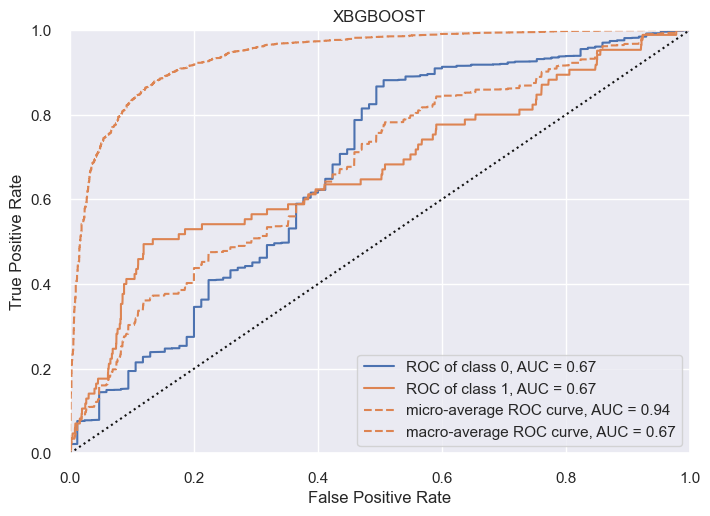

In [261]:
# ROC-AUC TEST
viz_XGBC = ROCAUC(XGBC_model,title = 'XBGBOOST')
viz_XGBC.fit(ban_xtrain,b_ytrain)
viz_XGBC.score(xtest,ytest)
viz_XGBC.show(figsize=(5,5));

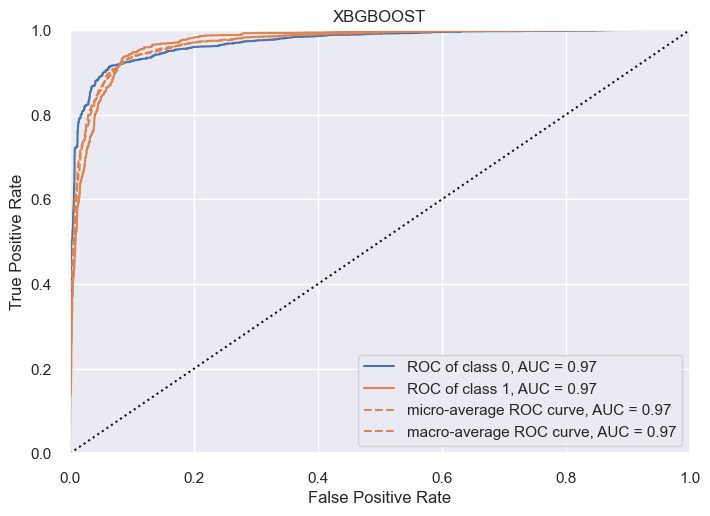

In [262]:
# ROC-AUC TRAIN
viz_XGBC = ROCAUC(XGBC_model,title = 'XBGBOOST')
viz_XGBC.fit(ban_xtrain,b_ytrain)
viz_XGBC.score(ban_xtrain,b_ytrain)
viz_XGBC.show();

#### Shapley Values

In the case to get importance feature for models base in tree models we can use [Shapley Values](https://medium.com/dataman-in-ai/explain-your-model-with-the-shap-values-bc36aac4de3d)

In [266]:
#define the model for shaply values
df_model = XGBC_model
shap.initjs()
explainer = shap.TreeExplainer(df_model)
shap_values = explainer.shap_values(xtest)

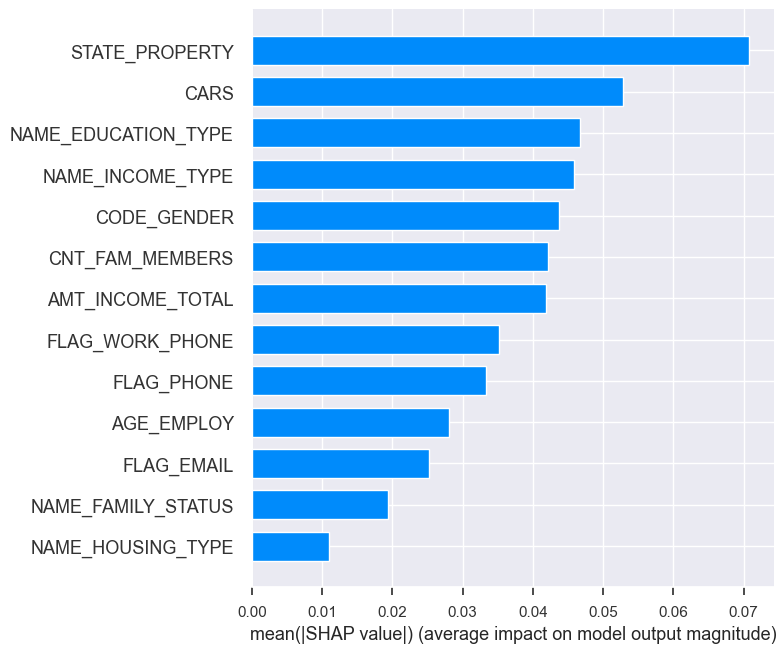

In [267]:
shap.summary_plot(shap_values,xtest,plot_type='bar');

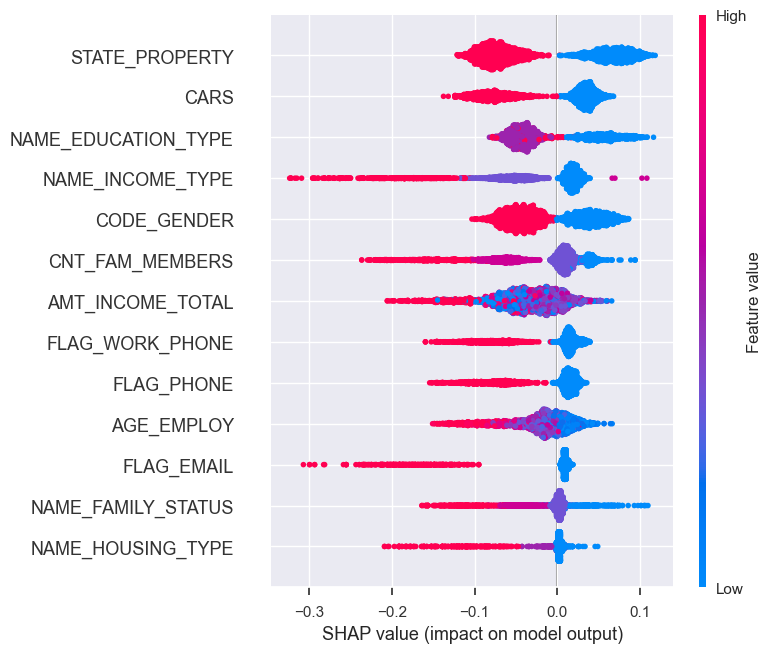

In [268]:
shap.summary_plot(shap_values,xtest);

In the feature importance using shapley values we can see that if people own or not a place give information for get a default, follow for car things that people has an ownership.

### Decision Tree

The implementation of the decision tree it is base of the probability for each way that can take base in the target variable more explanation in [Decision Tree](https://towardsdatascience.com/decision-trees-explained-3ec41632ceb6)

In [269]:
#crethe the grid seachr for best parameters
param_grid={ "criterion" : ["gini", "entropy"],
                "min_samples_leaf": [5,10,15,20], 
                "max_depth" : [8,9,10,11,12],
                "min_samples_split": [2, 3, 4],
                'random_state':[42]
            }
#Define de model
model_tree = DecisionTreeClassifier()

scoring = {'AUC':'roc_auc',
           'Accuracy':make_scorer(accuracy_score)}

#create the kfold obejtct
num_fold = 10
kfold = StratifiedKFold(n_splits=num_fold,random_state=42,shuffle=True)

#create the grid search object
n_iter = 25
grid = RandomizedSearchCV(
    estimator=model_tree,
    param_distributions=param_grid,
    cv=kfold,
    scoring=scoring,
    n_jobs=-1,
    n_iter=n_iter,
    refit="AUC",
    random_state=42
)
#fit the model
tree_model = grid.fit(ban_xtrain,b_ytrain)
print(tree_model.best_estimator_)

DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_leaf=5,
                       min_samples_split=3, random_state=42)


In [270]:
model_tree = tree_model.best_estimator_

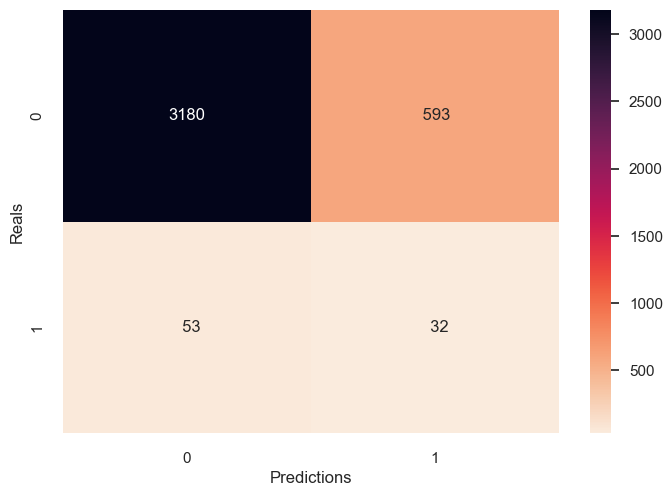

              precision    recall  f1-score   support

           0     0.9836    0.8428    0.9078      3773
           1     0.0512    0.3765    0.0901        85

    accuracy                         0.8326      3858
   macro avg     0.5174    0.6097    0.4990      3858
weighted avg     0.9631    0.8326    0.8898      3858



In [271]:
#Doing the confusion matrix and the prediction metrics
predictions=model_tree.predict(xtest)
sns.heatmap(confusion_matrix(ytest, predictions), annot=True, fmt='4d',cmap = 'rocket_r')
plt.xlabel('Predictions')
plt.ylabel('Reals')
plt.show()
print(classification_report(ytest, predictions, digits=4))

In [272]:
#Validation the Train and test metrics
pred_test_tree = model_tree.predict(xtest)
pred_train_tree = model_tree.predict(ban_xtrain)
print('Train Accuracy {}'.format(accuracy_score(b_ytrain,pred_train_tree)))
print('Test Accuracy {}'.format(accuracy_score(ytest,pred_test_tree)))

Train Accuracy 0.9079963652885052
Test Accuracy 0.8325557283566615


X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


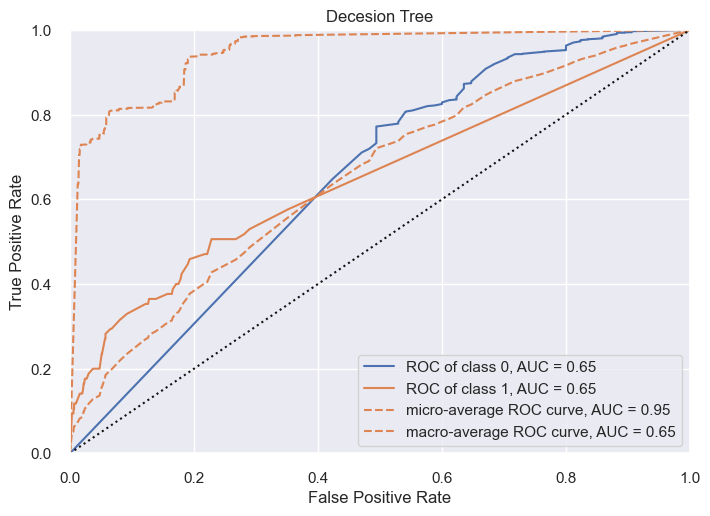

In [273]:
# ROC-AUC TEST
viz_XGBC = ROCAUC(model_tree,title = 'Decesion Tree')
viz_XGBC.fit(ban_xtrain,b_ytrain)
viz_XGBC.score(xtest,ytest)
viz_XGBC.show(figsize=(5,5));

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


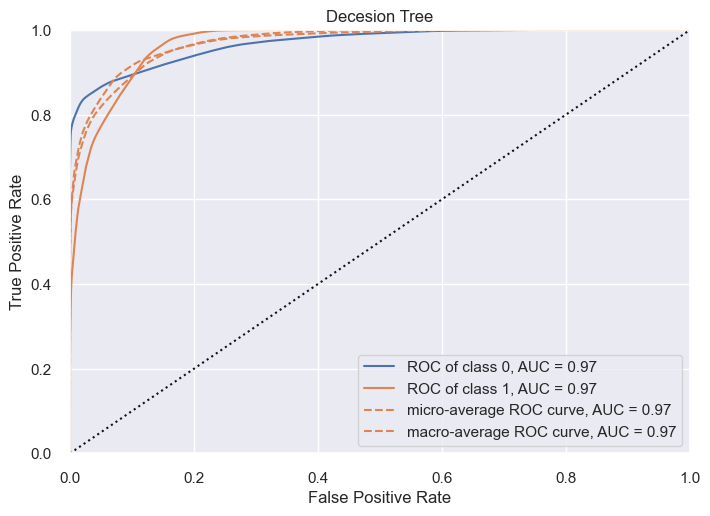

In [274]:
# ROC-AUC TRAIN

viz_XGBC = ROCAUC(model_tree,title = 'Decesion Tree')
viz_XGBC.fit(ban_xtrain,b_ytrain)
viz_XGBC.score(ban_xtrain,b_ytrain)
viz_XGBC.show();

### Shapley Values

In [275]:
#define the model for shaply values
df_model = model_tree
shap.initjs()
explainer = shap.TreeExplainer(df_model)
shap_values = explainer.shap_values(xtest)

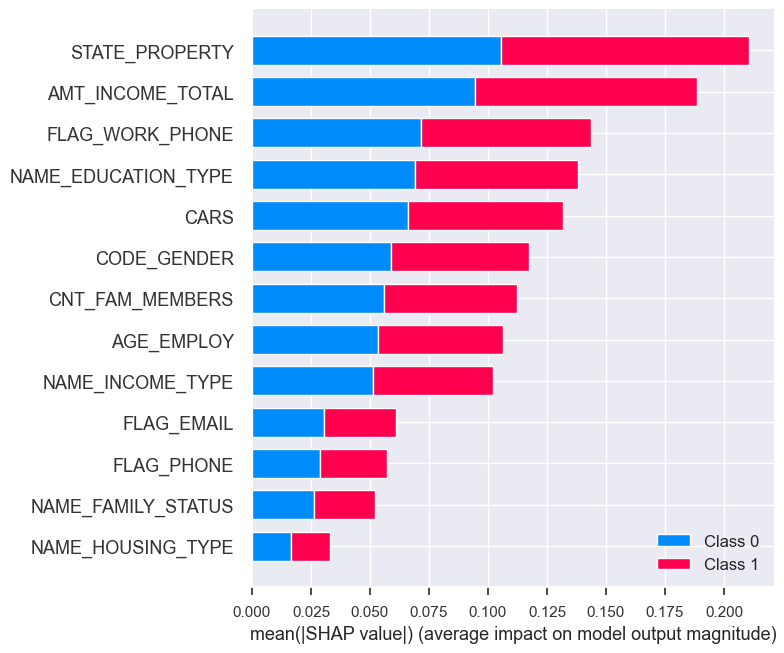

In [276]:
shap.summary_plot(shap_values,xtest,plot_type='bar');

As we can see the more important variables it is own a property and also the income that get, if we se proportion red that give us an idea of which can give us the bad clients.

### Random Forest

As a decision tree base we have random forest that run multi decision tree for getting here is more explanation [Random Forest](https://towardsdatascience.com/understanding-random-forest-58381e0602d2)

In [277]:
#crethe the grid seachr for best parameters
param_grid={ "criterion" : ["gini", "entropy"],
                "min_samples_leaf": [5,10,15,20], 
                "max_depth" : [8,9,10,11,12],
                "min_samples_split": [2, 3, 4],
                'random_state':[42]
            }
#Define de model
model_rand_fores = RandomForestClassifier()

scoring = {'AUC':'roc_auc',
           'Accuracy':make_scorer(accuracy_score)}

#create the kfold obejtct
num_fold = 10
kfold = StratifiedKFold(n_splits=num_fold,random_state=42,shuffle=True)

#create the grid search object
n_iter = 25
grid = RandomizedSearchCV(
    estimator=model_rand_fores,
    param_distributions=param_grid,
    cv=kfold,
    scoring=scoring,
    n_jobs=-1,
    n_iter=n_iter,
    refit="AUC",
    random_state=42
)
#fit the model
random_forest_model = grid.fit(ban_xtrain,b_ytrain)
print(random_forest_model.best_estimator_)

RandomForestClassifier(criterion='entropy', max_depth=12, min_samples_leaf=5,
                       min_samples_split=3, random_state=42)


In [278]:
#save the model
model_random_forest = random_forest_model.best_estimator_

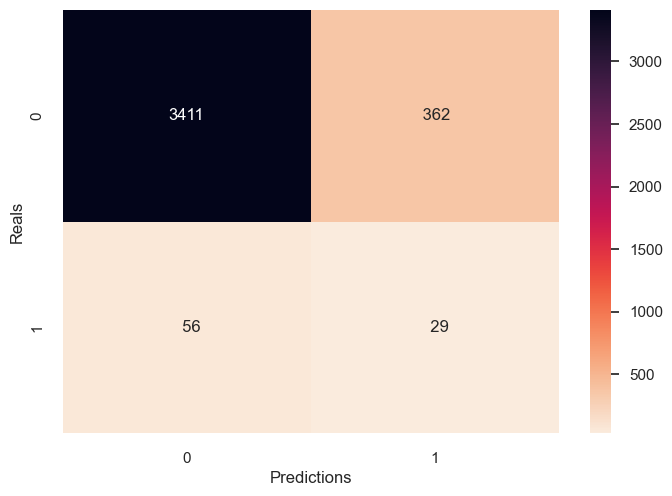

              precision    recall  f1-score   support

           0     0.9838    0.9041    0.9423      3773
           1     0.0742    0.3412    0.1218        85

    accuracy                         0.8917      3858
   macro avg     0.5290    0.6226    0.5321      3858
weighted avg     0.9638    0.8917    0.9242      3858



In [279]:
#Doing the confusion matrix and the prediction metrics
predictions=model_random_forest.predict(xtest)
sns.heatmap(confusion_matrix(ytest, predictions), annot=True, fmt='4d',cmap = 'rocket_r')
plt.xlabel('Predictions')
plt.ylabel('Reals')
plt.show()
print(classification_report(ytest, predictions, digits=4))

In [280]:
#Validation the Train and test metrics
pred_test_forest = model_random_forest.predict(xtest)
pred_train_forest = model_random_forest.predict(ban_xtrain)
print('Train Accuracy {}'.format(accuracy_score(b_ytrain,pred_train_forest)))
print('Test Accuracy {}'.format(accuracy_score(ytest,pred_test_forest)))

Train Accuracy 0.9398568832348932
Test Accuracy 0.8916537065837221


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


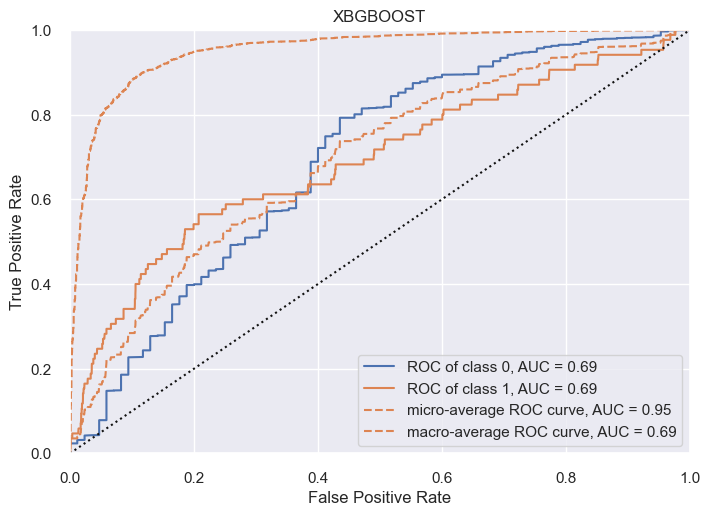

In [281]:
# ROC-AUC TEST

viz_XGBC = ROCAUC(model_random_forest,title = 'XBGBOOST')
viz_XGBC.fit(ban_xtrain,b_ytrain)
viz_XGBC.score(xtest,ytest)
viz_XGBC.show(figsize=(5,5));

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


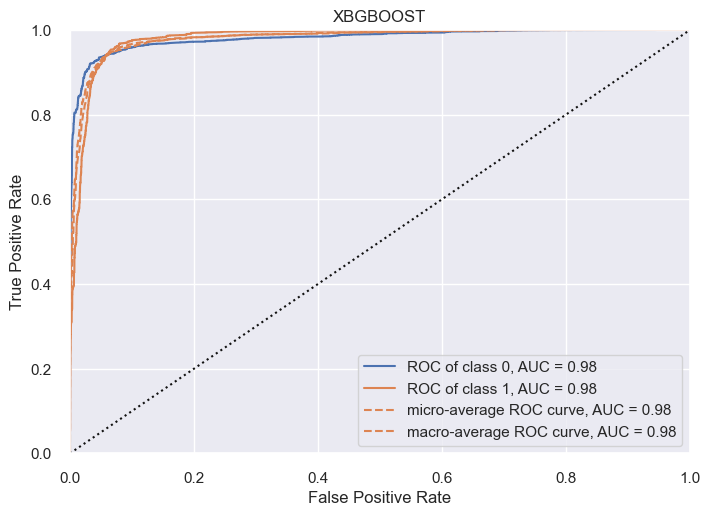

In [282]:
# ROC-AUC TRAIN

viz_XGBC = ROCAUC(model_random_forest,title = 'XBGBOOST')
viz_XGBC.fit(ban_xtrain,b_ytrain)
viz_XGBC.score(ban_xtrain,b_ytrain)
viz_XGBC.show();

#### Shapley Values

In [283]:
#define the model for shaply values
df_model = model_random_forest
shap.initjs()
explainer = shap.TreeExplainer(df_model)
shap_values = explainer.shap_values(xtest)

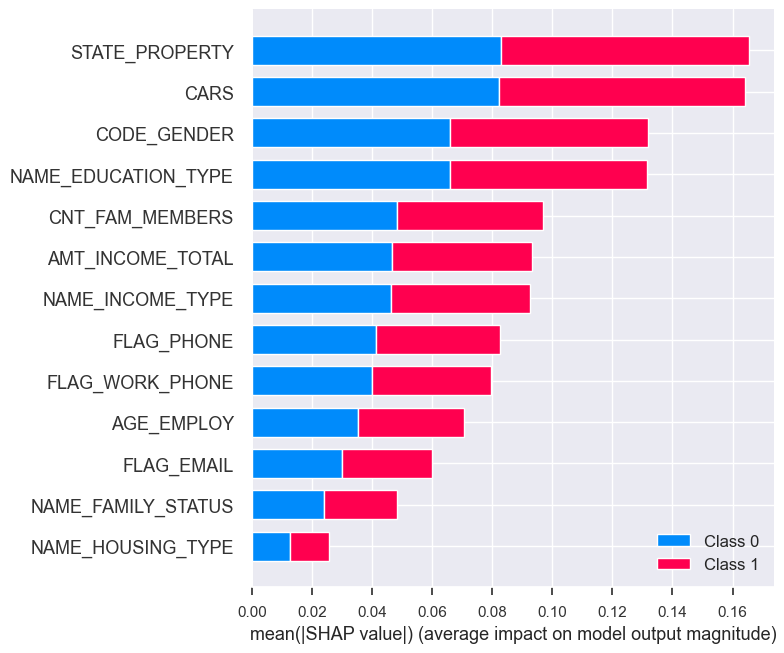

In [284]:
shap.summary_plot(shap_values,xtest,plot_type='bar');

In the feature importance using shapley values we can see that if people own or not a place give information for get a default, follow for car things that people has an ownership.

### Logistic Regression

As a linear model base the logisctic regression get the posibility for classification more explain in [Logistic Regression](https://towardsdatascience.com/logistic-regression-explained-9ee73cede081)

In [285]:
param_grid={'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
            'penalty':['l2'],
            'C':[100, 10, 1.0, 0.1, 0.01],
            'random_state':[42]}
#Define de model
model_logic = LogisticRegression()

scoring = {'AUC':'roc_auc',
           'Accuracy':make_scorer(accuracy_score)}

#create the kfold obejtct
num_fold = 10
kfold = StratifiedKFold(n_splits=num_fold,random_state=42,shuffle=True)

#create the grid search object
n_iter = 25
grid = RandomizedSearchCV(
    estimator=model_logic,
    param_distributions=param_grid,
    cv=kfold,
    scoring=scoring,
    n_jobs=-1,
    n_iter=n_iter,
    refit="AUC",
    random_state=42
)
#fit the model
model_logic = grid.fit(ban_xtrain,b_ytrain)
print(model_logic.best_estimator_)

The total space of parameters 15 is smaller than n_iter=25. Running 15 iterations. For exhaustive searches, use GridSearchCV.


LogisticRegression(C=100, random_state=42, solver='liblinear')


In [286]:
logic_model = model_logic.best_estimator_

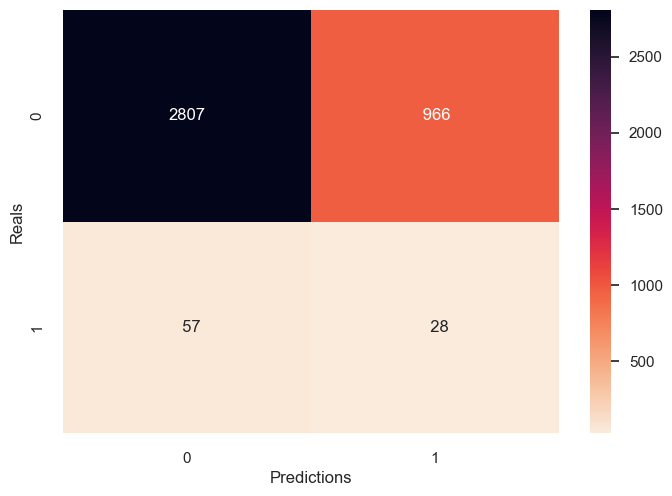

              precision    recall  f1-score   support

           0     0.9801    0.7440    0.8459      3773
           1     0.0282    0.3294    0.0519        85

    accuracy                         0.7348      3858
   macro avg     0.5041    0.5367    0.4489      3858
weighted avg     0.9591    0.7348    0.8284      3858



In [287]:
#Doing the confusion matrix and the prediction metrics
predictions=logic_model.predict(xtest)
sns.heatmap(confusion_matrix(ytest, predictions), annot=True, fmt='4d',cmap = 'rocket_r')
plt.xlabel('Predictions')
plt.ylabel('Reals')
plt.show()
print(classification_report(ytest, predictions, digits=4))

In [288]:
#Validation the Train and test metrics
pred_test_logic = logic_model.predict(xtest)
pred_train_logic = logic_model.predict(ban_xtrain)
print('Train Accuracy {}'.format(accuracy_score(b_ytrain,pred_train_logic)))
print('Test Accuracy {}'.format(accuracy_score(ytest,pred_test_logic)))

Train Accuracy 0.7603930031803725
Test Accuracy 0.7348367029548989


X does not have valid feature names, but LogisticRegression was fitted with feature names


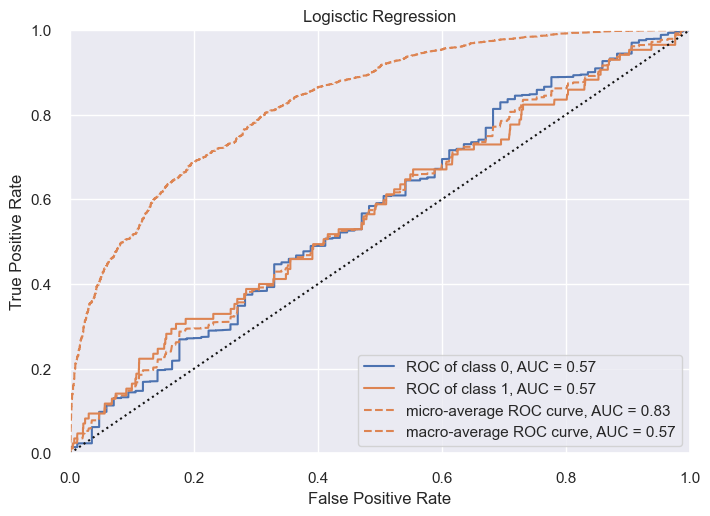

In [289]:
# ROC-AUC TEST

viz_XGBC = ROCAUC(logic_model,title = 'Logisctic Regression')
viz_XGBC.fit(ban_xtrain,b_ytrain)
viz_XGBC.score(xtest,ytest)
viz_XGBC.show(figsize=(5,5));

X does not have valid feature names, but LogisticRegression was fitted with feature names


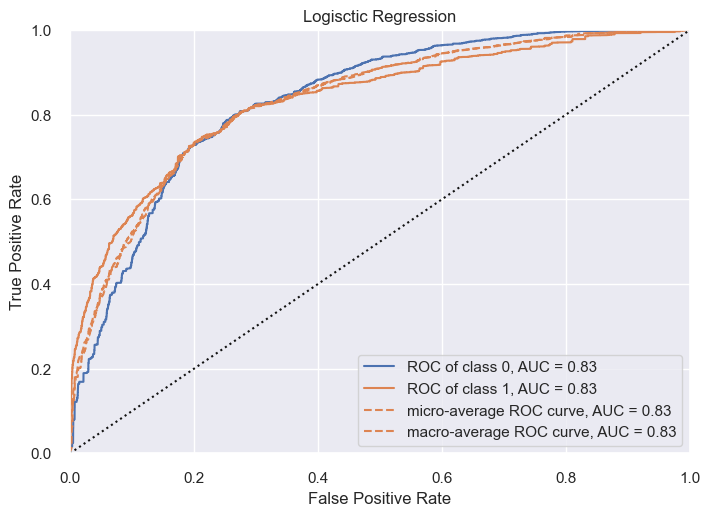

In [290]:
# ROC-AUC TRAIN

viz_XGBC = ROCAUC(logic_model,title = 'Logisctic Regression')
viz_XGBC.fit(ban_xtrain,b_ytrain)
viz_XGBC.score(ban_xtrain,b_ytrain)
viz_XGBC.show();

#### Importance

In [291]:
#getting the coeficient
coefic = logic_model.coef_.copy()
coefic = coefic.ravel().tolist()

In [292]:
#Create a dataframe with the information
summary_import_var = pd.DataFrame({'variable': ban_xtrain.columns,
                                  'coef': coefic})

In [293]:
#take out the coeficient that are 0
summary_import_var.loc[summary_import_var.coef!=0]

,variable,coef
0,CODE_GENDER,-0.863820
1,AMT_INCOME_TOTAL,-0.073150
2,NAME_INCOME_TYPE,-0.435669
3,NAME_EDUCATION_TYPE,-0.750000
4,NAME_FAMILY_STATUS,-0.778064
5,NAME_HOUSING_TYPE,-0.350628
6,FLAG_WORK_PHONE,-0.775427
7,FLAG_PHONE,-0.523207
8,FLAG_EMAIL,-1.885113
9,CNT_FAM_MEMBERS,-0.778856


Looking into the coeficient for the logisctic regression we can see that neither of the variable are possitive all get negative symbol mean that the variables get mote bad clients.

### SVC

The Support vector manchine classifier it is a model that try to divide the target using the diferents feature base in high dimensional, more in formation in [SVM C](https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989#:~:text=SVM%20or%20Support%20Vector%20Machine,separates%20the%20data%20into%20classes.)

In [294]:
#crethe the grid seachr for best parameters
param_grid={'C': [1, 10, 100, 500],
            'kernel': ['rbf','sigmoid'],
            'gamma': [0.01,0.001,0.0001],
            'random_state':[42]
            }
#Define de model
model_SVC = SVC()

scoring = {'AUC':'roc_auc',
           'Accuracy':make_scorer(accuracy_score)}

#create the kfold obejtct
num_fold = 10
kfold = StratifiedKFold(n_splits=num_fold,random_state=42,shuffle=True)

#create the grid search object
n_iter = 25
grid = RandomizedSearchCV(
    estimator=model_SVC,
    param_distributions=param_grid,
    cv=kfold,
    scoring=scoring,
    n_jobs=-1,
    n_iter=n_iter,
    refit="AUC",
    random_state=42
)
#fit the model
model_SVC = grid.fit(ban_xtrain,b_ytrain)
print(model_SVC.best_estimator_)

The total space of parameters 24 is smaller than n_iter=25. Running 24 iterations. For exhaustive searches, use GridSearchCV.


SVC(C=500, gamma=0.01, random_state=42)


In [295]:
SVC_model = model_SVC.best_estimator_

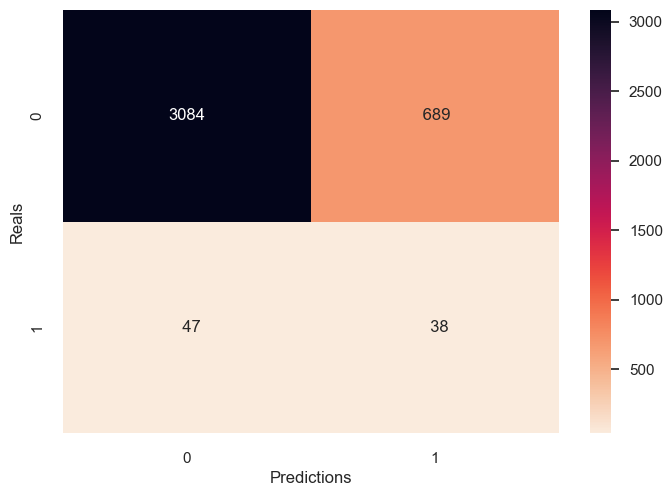

              precision    recall  f1-score   support

           0     0.9850    0.8174    0.8934      3773
           1     0.0523    0.4471    0.0936        85

    accuracy                         0.8092      3858
   macro avg     0.5186    0.6322    0.4935      3858
weighted avg     0.9644    0.8092    0.8758      3858



In [296]:
#Doing the confusion matrix and the prediction metrics
predictions=SVC_model.predict(xtest)
sns.heatmap(confusion_matrix(ytest, predictions), annot=True, fmt='4d',cmap = 'rocket_r')
plt.xlabel('Predictions')
plt.ylabel('Reals')
plt.show()
print(classification_report(ytest, predictions, digits=4))

In [297]:
#Validation the Train and test metrics
pred_test_SVC = SVC_model.predict(xtest)
pred_train_SVC = logic_model.predict(ban_xtrain)
print('Train Accuracy {}'.format(accuracy_score(b_ytrain,pred_train_SVC)))
print('Test Accuracy {}'.format(accuracy_score(ytest,pred_test_SVC)))

Train Accuracy 0.7603930031803725
Test Accuracy 0.809227579056506


X does not have valid feature names, but SVC was fitted with feature names


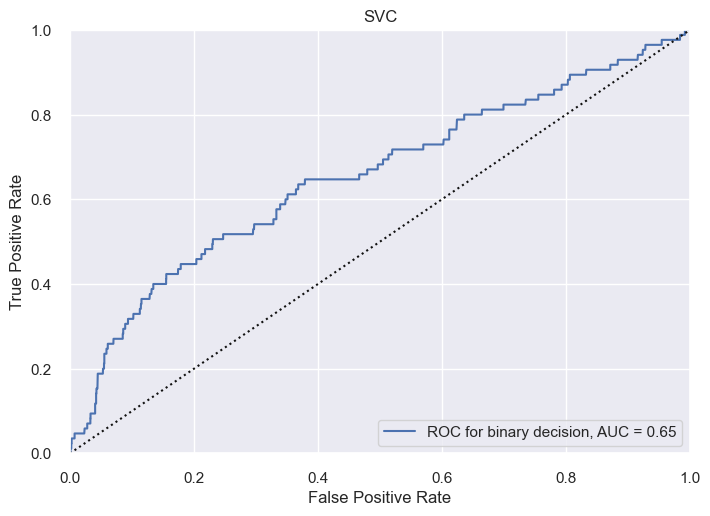

In [298]:
# ROC-AUC TEST

viz_XGBC = ROCAUC(SVC_model,title = 'SVC',binary=True)
viz_XGBC.fit(ban_xtrain,b_ytrain)
viz_XGBC.score(xtest,ytest)
viz_XGBC.show(figsize=(5,5));

X does not have valid feature names, but SVC was fitted with feature names


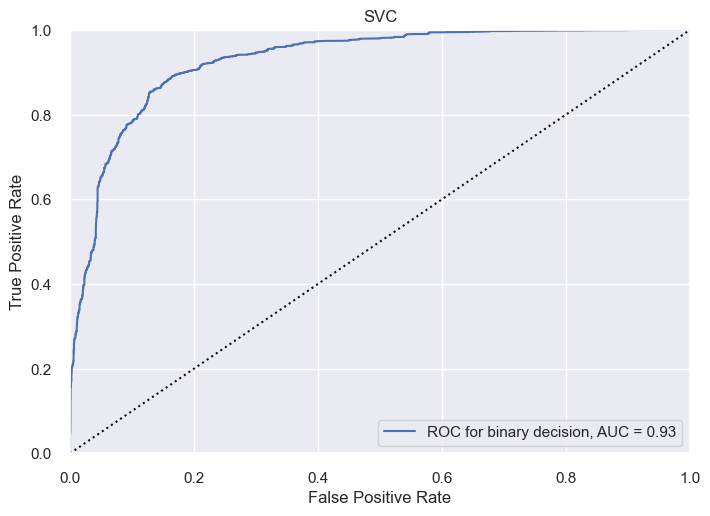

In [300]:
# ROC-AUC TRAIN

viz_XGBC = ROCAUC(SVC_model,title = 'SVC',binary=True)
viz_XGBC.fit(ban_xtrain,b_ytrain)
viz_XGBC.score(ban_xtrain,b_ytrain)
viz_XGBC.show();

In the SVC case using rbf kernel it is not posible to determine the weight of importance for each variable.

If we see each ROC and AUC curve for the train case they looks we overfiting but it is not, this happen when we have a perfect balance information which it is the case by using SMOTE.

## <a class="anchor" id="#RESUL">Part III: Results</a>

### Selection by Metrics

In this part we create a table that consolidated the metrics results of the models.

In [301]:
#create the table consolidation for model
nombre_modelos = ['XGC Boost',
                  'Decision Tree',
                  'Random Forest',
                  'Logistic Regression',
                  'SVC']

modelos = [XGBC_model,model_tree,model_random_forest,logic_model,SVC_model]

lista_accuracy = []
lista_recall = []
lista_precision = []
lista_f1score = []

for modelo in modelos:
    ypred = modelo.predict(xtest)
    lista_accuracy.append(accuracy_score(ytest, ypred))
    lista_recall.append(recall_score(ytest, ypred))
    lista_precision.append(precision_score(ytest, ypred))
    lista_f1score.append(f1_score(ytest, ypred))

comparativa_dict = {'Modelo': nombre_modelos,
                   'Accuracy': lista_accuracy,
                   'Recall': lista_recall,
                   'Precision': lista_precision,
                   'F1 score': lista_f1score}

comparativa = pd.DataFrame(comparativa_dict)


display(comparativa)

,Modelo,Accuracy,Recall,Precision,F1 score
0,XGC Boost,0.869362,0.494118,0.083499,0.142857
1,Decision Tree,0.832556,0.376471,0.051200,0.090141
2,Random Forest,0.891654,0.341176,0.074169,0.121849
3,Logistic Regression,0.734837,0.329412,0.028169,0.051900
4,SVC,0.809228,0.447059,0.052270,0.093596


As we said in the beginning we are going to run five models to identify which will be get the best performance base in the F1 result to predict the probability of default of the clients base in their characteristics and we were to take the best F1 Score for the bad clients. 

In the table over we can see the models that have the best F1 Score are XGC Boost and the Ramdon forest but the first have at least 200 bps in the metrics.

### <a class="anchor" id="#CONCLU">Part IV: Conclusion</a>

In [308]:
Model_results = {'Base BGI':[y.mean()*100],
                 'BGI XGC Boost':pd.DataFrame(XGBC_model.predict(xtest)).mean()*100,
                 'BGI Random Forest':pd.DataFrame(model_random_forest.predict(xtest)).mean()*100}
Model_results = pd.DataFrame(Model_results)
Model_results

,Base BGI,BGI XGC Boost,BGI Random Forest
0,2.200622,13.037843,10.134785


The propuse of this notebook was to identify which variables are the best for predict the probability of default in clients that have credit cards aprovals, taking into the count clients that have information in the last 12 months and the max of non-payment in that period of time and getting the nowadays information.

Non-payment was define as 60 days or more without pay that give us the dependent variable and after looking for the clients that really have 12 month of information. When we implement the models knew that we have a unbalanced target we used a SMOTE for balanced.

With the implementation of diferents models and getting the best model as XGBoost Classifier that have the best F1 score base in the way that precision and recall relation for this metric and also when we have unbalanced target.

In conclusion the model select it is posible to determine 10.83% more of bad clients base in the information have, this means that in bank if you put as a credit 1 millon of dolars you are able to loss 100k, when before you are just viable to predict 2k of lossing in the long run that is a problem for the business of credit that you want to recolect the money that you lend and get the interest from that.